In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pybamm
import pandas as pd

In [2]:
file_path = "/Users/isabelagaloustian/Library/CloudStorage/OneDrive-DrexelUniversity/General - Chang Lab/Group/Data/Gigafactory and Mining Data/TSE_extracted_globalenergydemand.csv"
df = pd.read_csv(file_path)
df.columns = ['Year', 'Global GWh Demand']
df['Global GWh Demand'] = df['Global GWh Demand'].apply(lambda x: x * 1000000) # rescale plot values then convert to Gwh

In [ ]:
parameter_values = pybamm.ParameterValues("Chen2020")
print(parameter_values)

Defining mass calculating functions. 1. Includes plots, 2. Values only 

In [3]:
def AM_plotter(GWh, nom_voltage, type): 
    """
    input: desired GWh/y, nominal voltage, type of LIB cathode 
    output: plotted active mass required of Li, Ni, Mn, Co for NMC622, NMC811, NMC532, NMC111
    """ 
    F = 96485 # faradays constant 
    MM_622 = 96.911 # molar mass NMC622
    MM_811 = 97.263 # molar mass NMC811
    MM_532 = 96.536 # molar mass NMC532
    MM_111 = 211.49 # molar mass NMC111
    names = ['Li', 'Ni', 'Mn', 'Co']
    elyte = 0.0454 # %Li in 1M LiPF6 in 1:1 EC:DEC

    if type == 622:
        masses_622 = []
        element_622 = [(0.0714+elyte), 0.363, 0.113, 0.330] # percent of each element in NMC622
        for e in element_622: 
            AM_mass = (GWh*(3.6*(10**12))*e)/(nom_voltage*3600*(F/(3600*MM_622))*(1.0*(10**6)))
            masses_622.append(AM_mass)
        fig, ax = plt.subplots()
        ax.bar(names,masses_622)
        ax.set_title(f'required mass: NMC6222, {GWh} GWh')
        ax.set_xlabel('Critical Mineral')
        ax.set_ylabel('mass (tonnes)')
        return fig, print(f"tonnes Li: {masses_622[0]:,.2f}, tonnes Ni: {masses_622[1]:,.2f}, tonnes Mn: {masses_622[2]:,.2f}, tonnes Co: {masses_622[3]:,.2f}") 
    elif type == 811: 
        masses_811 = []
        element_811 = [(0.0714+elyte), 0.483, 0.057, 0.061] # percent of each element in NMC811
        for e in element_811: 
            AM_mass = (GWh*(3.6*(10**12))*e)/(nom_voltage*3600*(F/(3600*MM_811))*(1.0*(10**6)))
            masses_811.append(AM_mass)
        fig, ax = plt.subplots()
        ax.bar(names,masses_811)
        ax.set_title(f'required mass: NMC811, {GWh} GWh')
        ax.set_xlabel('Critical Mineral')
        ax.set_ylabel('mass (tonnes)')
        return fig, print(f"tonnes Li: {masses_811[0]:,.2f}, tonnes Ni: {masses_811[1]:,.2f}, tonnes Mn: {masses_811[2]:,.2f}, tonnes Co: {masses_811[3]:,.2f}")
    elif type == 532: 
        masses_532 = []
        element_532 = [(0.0719+elyte), 0.304, 0.171, 0.122]  # percent of each element in NMC532
        for e in element_532: 
            AM_mass = (GWh*(3.6*(10**12))*e)/(nom_voltage*3600*(F/(3600*MM_532))*(1.0*(10**6)))
            masses_532.append(AM_mass)
        fig, ax = plt.subplots()
        ax.bar(names,masses_532)
        ax.set_title(f'required mass: NMC532, {GWh} GWh')
        ax.set_xlabel('Critical Mineral')
        ax.set_ylabel('mass (tonnes)')
        return fig, print(f"tonnes Li: {masses_532[0]:,.2f}, tonnes Ni: {masses_532[1]:,.2f}, tonnes Mn: {masses_532[2]:,.2f}, tonnes Co: {masses_532[3]:,.2f}")
    elif type == 111: 
        masses_111 = []
        element_111 = [(0.0328+elyte), 0.278, 0.260, 0.279]  # percent of each element in NMC111
        for e in element_111: 
            AM_mass = (GWh*(3.6*(10**12))*e)/(nom_voltage*3600*(F/(3600*MM_111))*(1.0*(10**6)))
            masses_111.append(AM_mass)
        fig, ax = plt.subplots()
        ax.bar(names,masses_111)
        ax.set_title(f'required mass: NMC811, {GWh} GWh')
        ax.set_xlabel('Critical Mineral')
        ax.set_ylabel('mass (tonnes)')
        return fig, print(f"tonnes Li: {masses_111[0]:,.2f}, tonnes Ni: {masses_111[1]:,.2f}, tonnes Mn: {masses_111[2]:,.2f}, tonnes Co: {masses_111[3]:,.2f}")

In [4]:
def AM_calc(GWh, nom_voltage, type): 
    """
    input: desired GWh/y, nominal voltage, type of LIB cathode 
    output: active mass required of Li, Ni, Mn, Co for NMC622, NMC811, NMC532, NMC111, LCO, LFP
    """ 
    F = 96485 # faradays constant 
    MM_622 = 96.911 # molar mass NMC622
    MM_811 = 97.263 # molar mass NMC811
    MM_532 = 96.536 # molar mass NMC532
    MM_111 = 211.49 # molar mass NMC111
    MM_LFP = 157.76 # molar mass LiFePO4
    MM_LCO = 97.87 # molar mass LiCoO2
    elyte = 0.0454 # %Li in 1M LiPF6 in 1:1 EC:DEC

    if type == 622:
        masses_622 = []
        element_622 = [(0.0714+elyte), 0.363, 0.113, 0.330] # percent of each element in NMC622
        for e in element_622: 
            AM_mass = (GWh*(3.6*(10**12))*e)/(nom_voltage*3600*(F/(3600*MM_622))*(1.0*(10**6)))
            masses_622.append(AM_mass)
        return masses_622
    elif type == 811: 
        masses_811 = []
        element_811 = [(0.0714+elyte), 0.483, 0.057, 0.061] # percent of each element in NMC811
        for e in element_811: 
            AM_mass = (GWh*(3.6*(10**12))*e)/(nom_voltage*3600*(F/(3600*MM_811))*(1.0*(10**6)))
            masses_811.append(AM_mass)
        return masses_811
    elif type == 532: 
        masses_532 = []
        element_532 = [(0.0719+elyte), 0.304, 0.171, 0.122]  # percent of each element in NMC532
        for e in element_532: 
            AM_mass = (GWh*(3.6*(10**12))*e)/(nom_voltage*3600*(F/(3600*MM_532))*(1.0*(10**6)))
            masses_532.append(AM_mass)
        return masses_532
    elif type == 111: 
        masses_111 = []
        element_111 = [(0.0328+elyte), 0.278, 0.260, 0.279]  # percent of each element in NMC111
        for e in element_111: 
            AM_mass = (GWh*(3.6*(10**12))*e)/(nom_voltage*3600*(F/(3600*MM_111))*(1.0*(10**6)))
            masses_111.append(AM_mass)
        return masses_111
    elif type == "LFP": 
        masses_LFP = []
        element_LFP = [(0.044+elyte), 0, 0, 0]  # percent of each element in LiFePO4
        for e in element_LFP: 
            AM_mass = (GWh*(3.6*(10**12))*e)/(nom_voltage*3600*(F/(3600*MM_LFP))*(1.0*(10**6)))
            masses_LFP.append(AM_mass)
        return masses_LFP
    elif type == "LCO": 
        masses_LCO = []
        element_LCO = [(0.0709+elyte), 0, 0, 0.602]  # percent of each element in NMC111
        for e in element_LCO: 
            AM_mass = (GWh*(3.6*(10**12))*e)/(nom_voltage*3600*(F/(3600*MM_LCO))*(1.0*(10**6)))
            masses_LCO.append(AM_mass)
        return masses_LCO

Plotting varying cathode porosity vs critical mineral mass required, for 1. NMC811, 2. NMC532

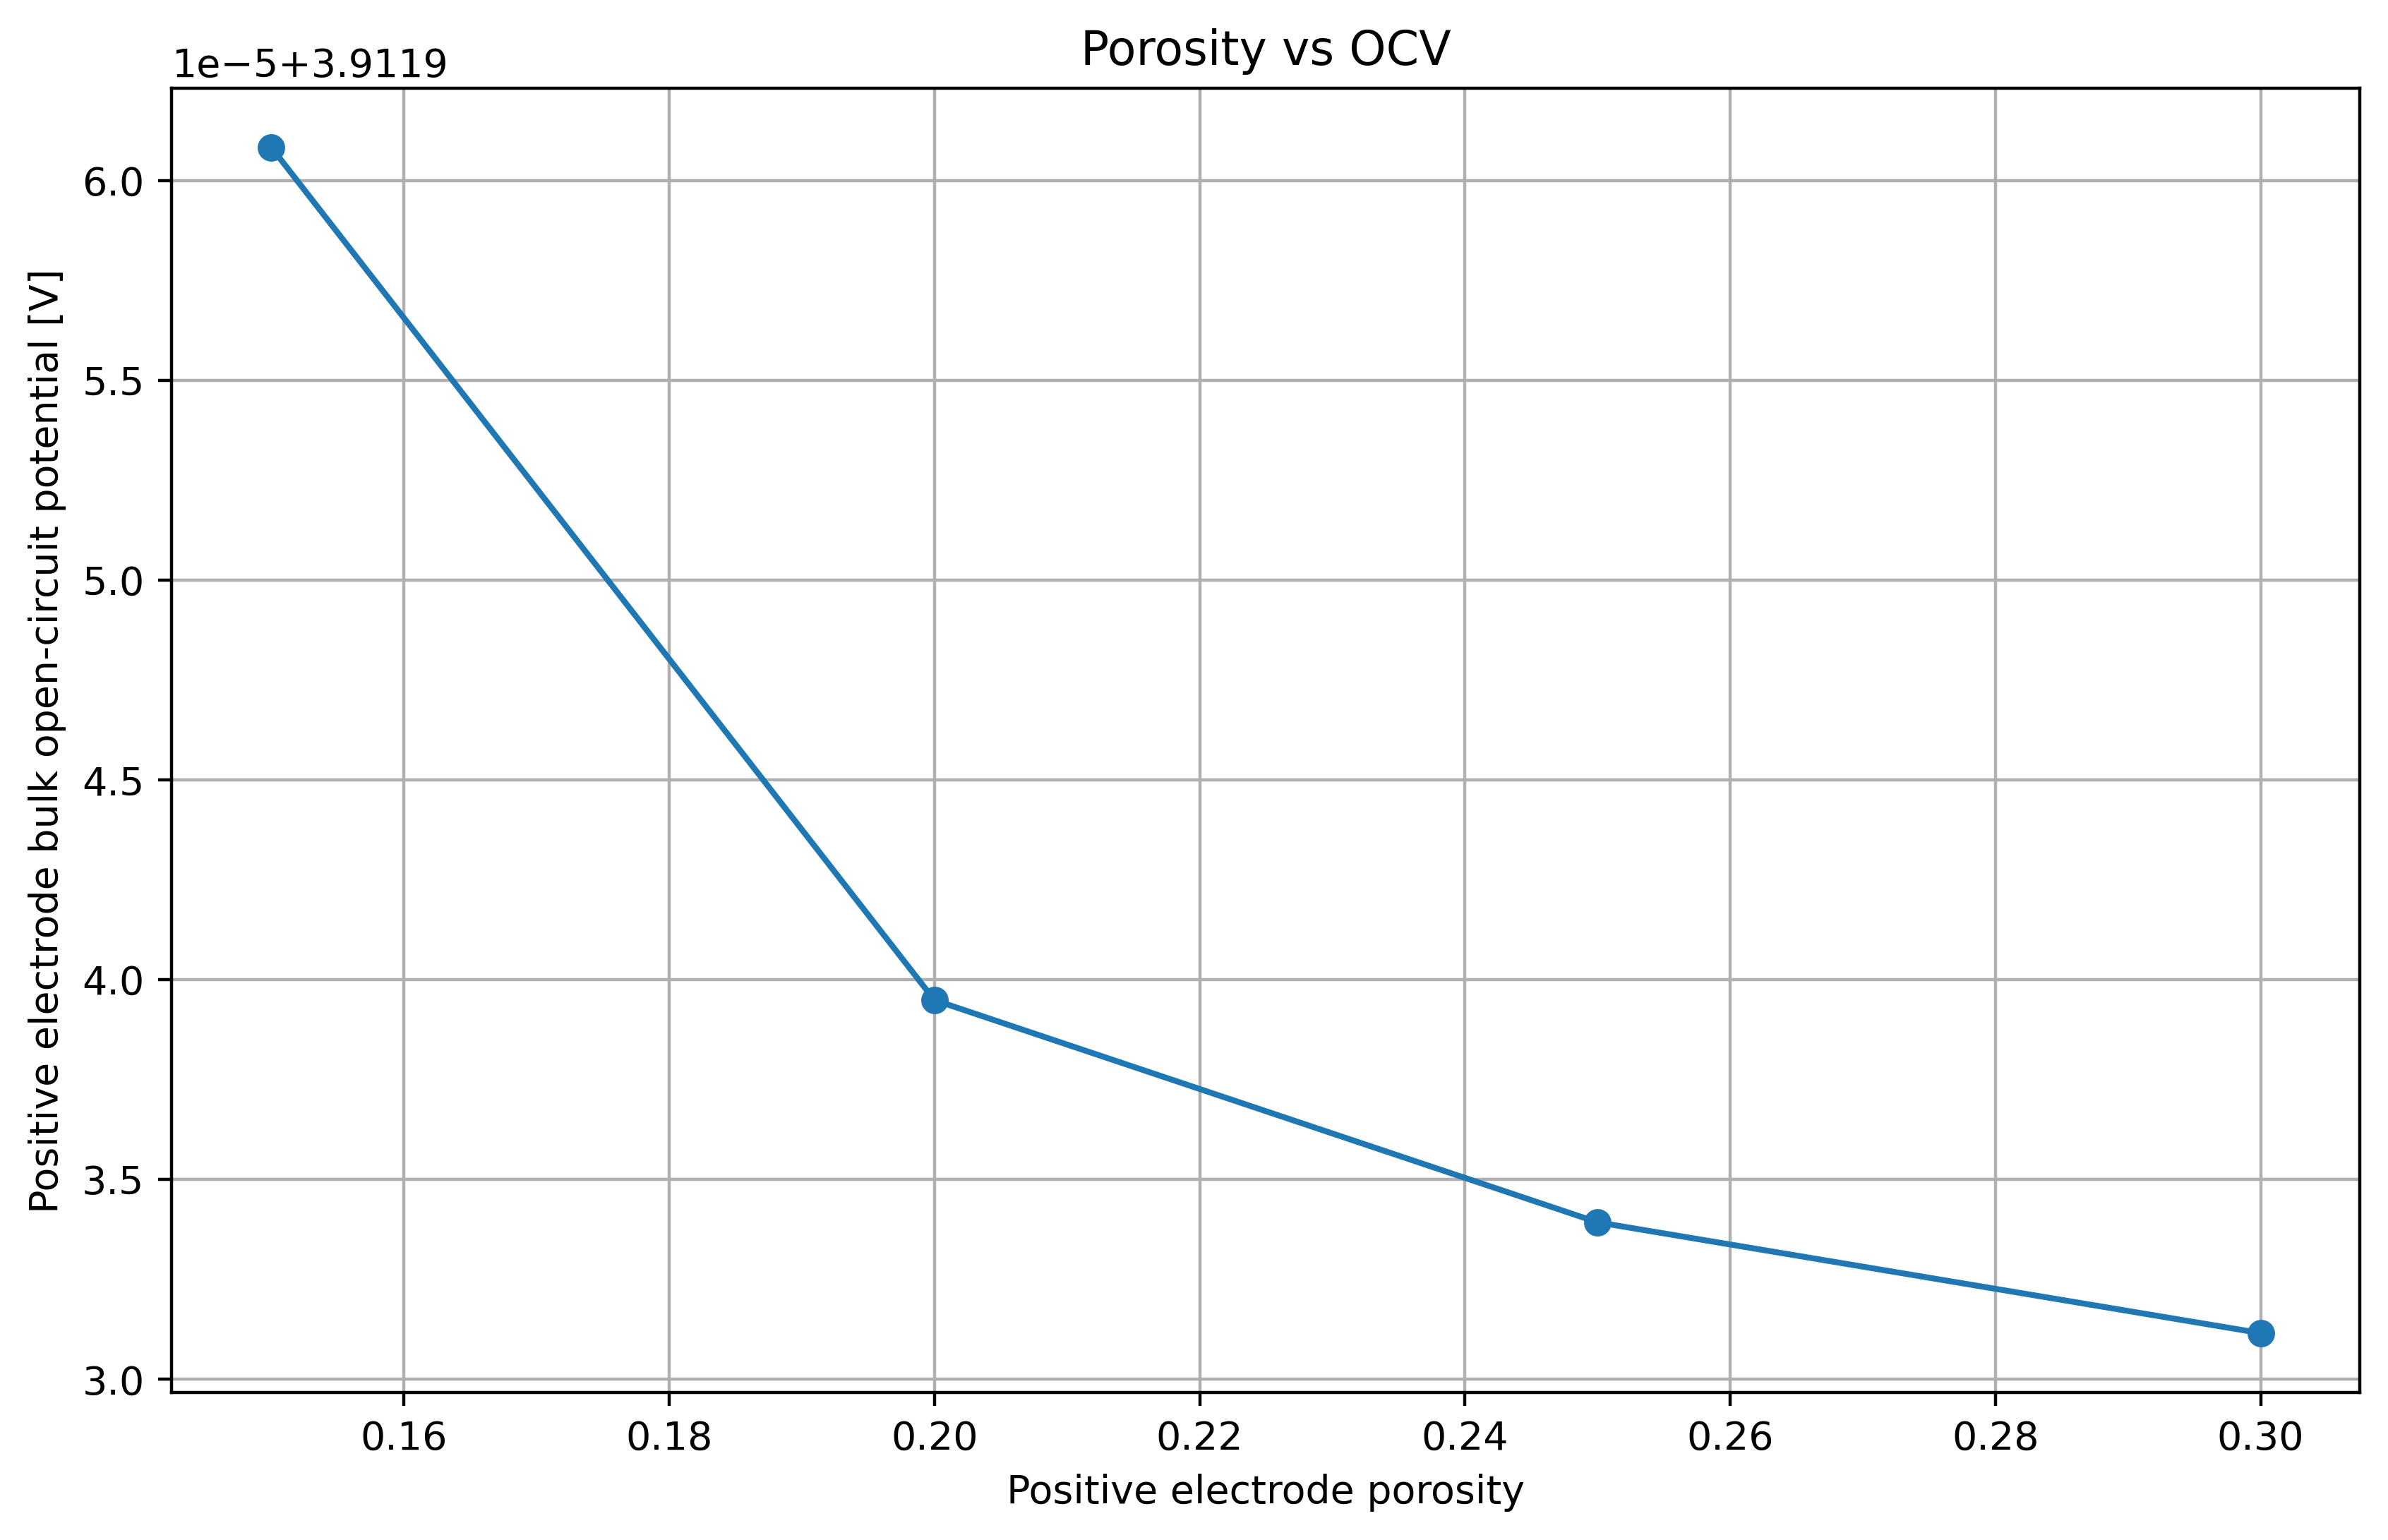

cath. thickness = 75.6um
cath. thickness = 75.6um
cath. thickness = 75.6um
cath. thickness = 75.6um


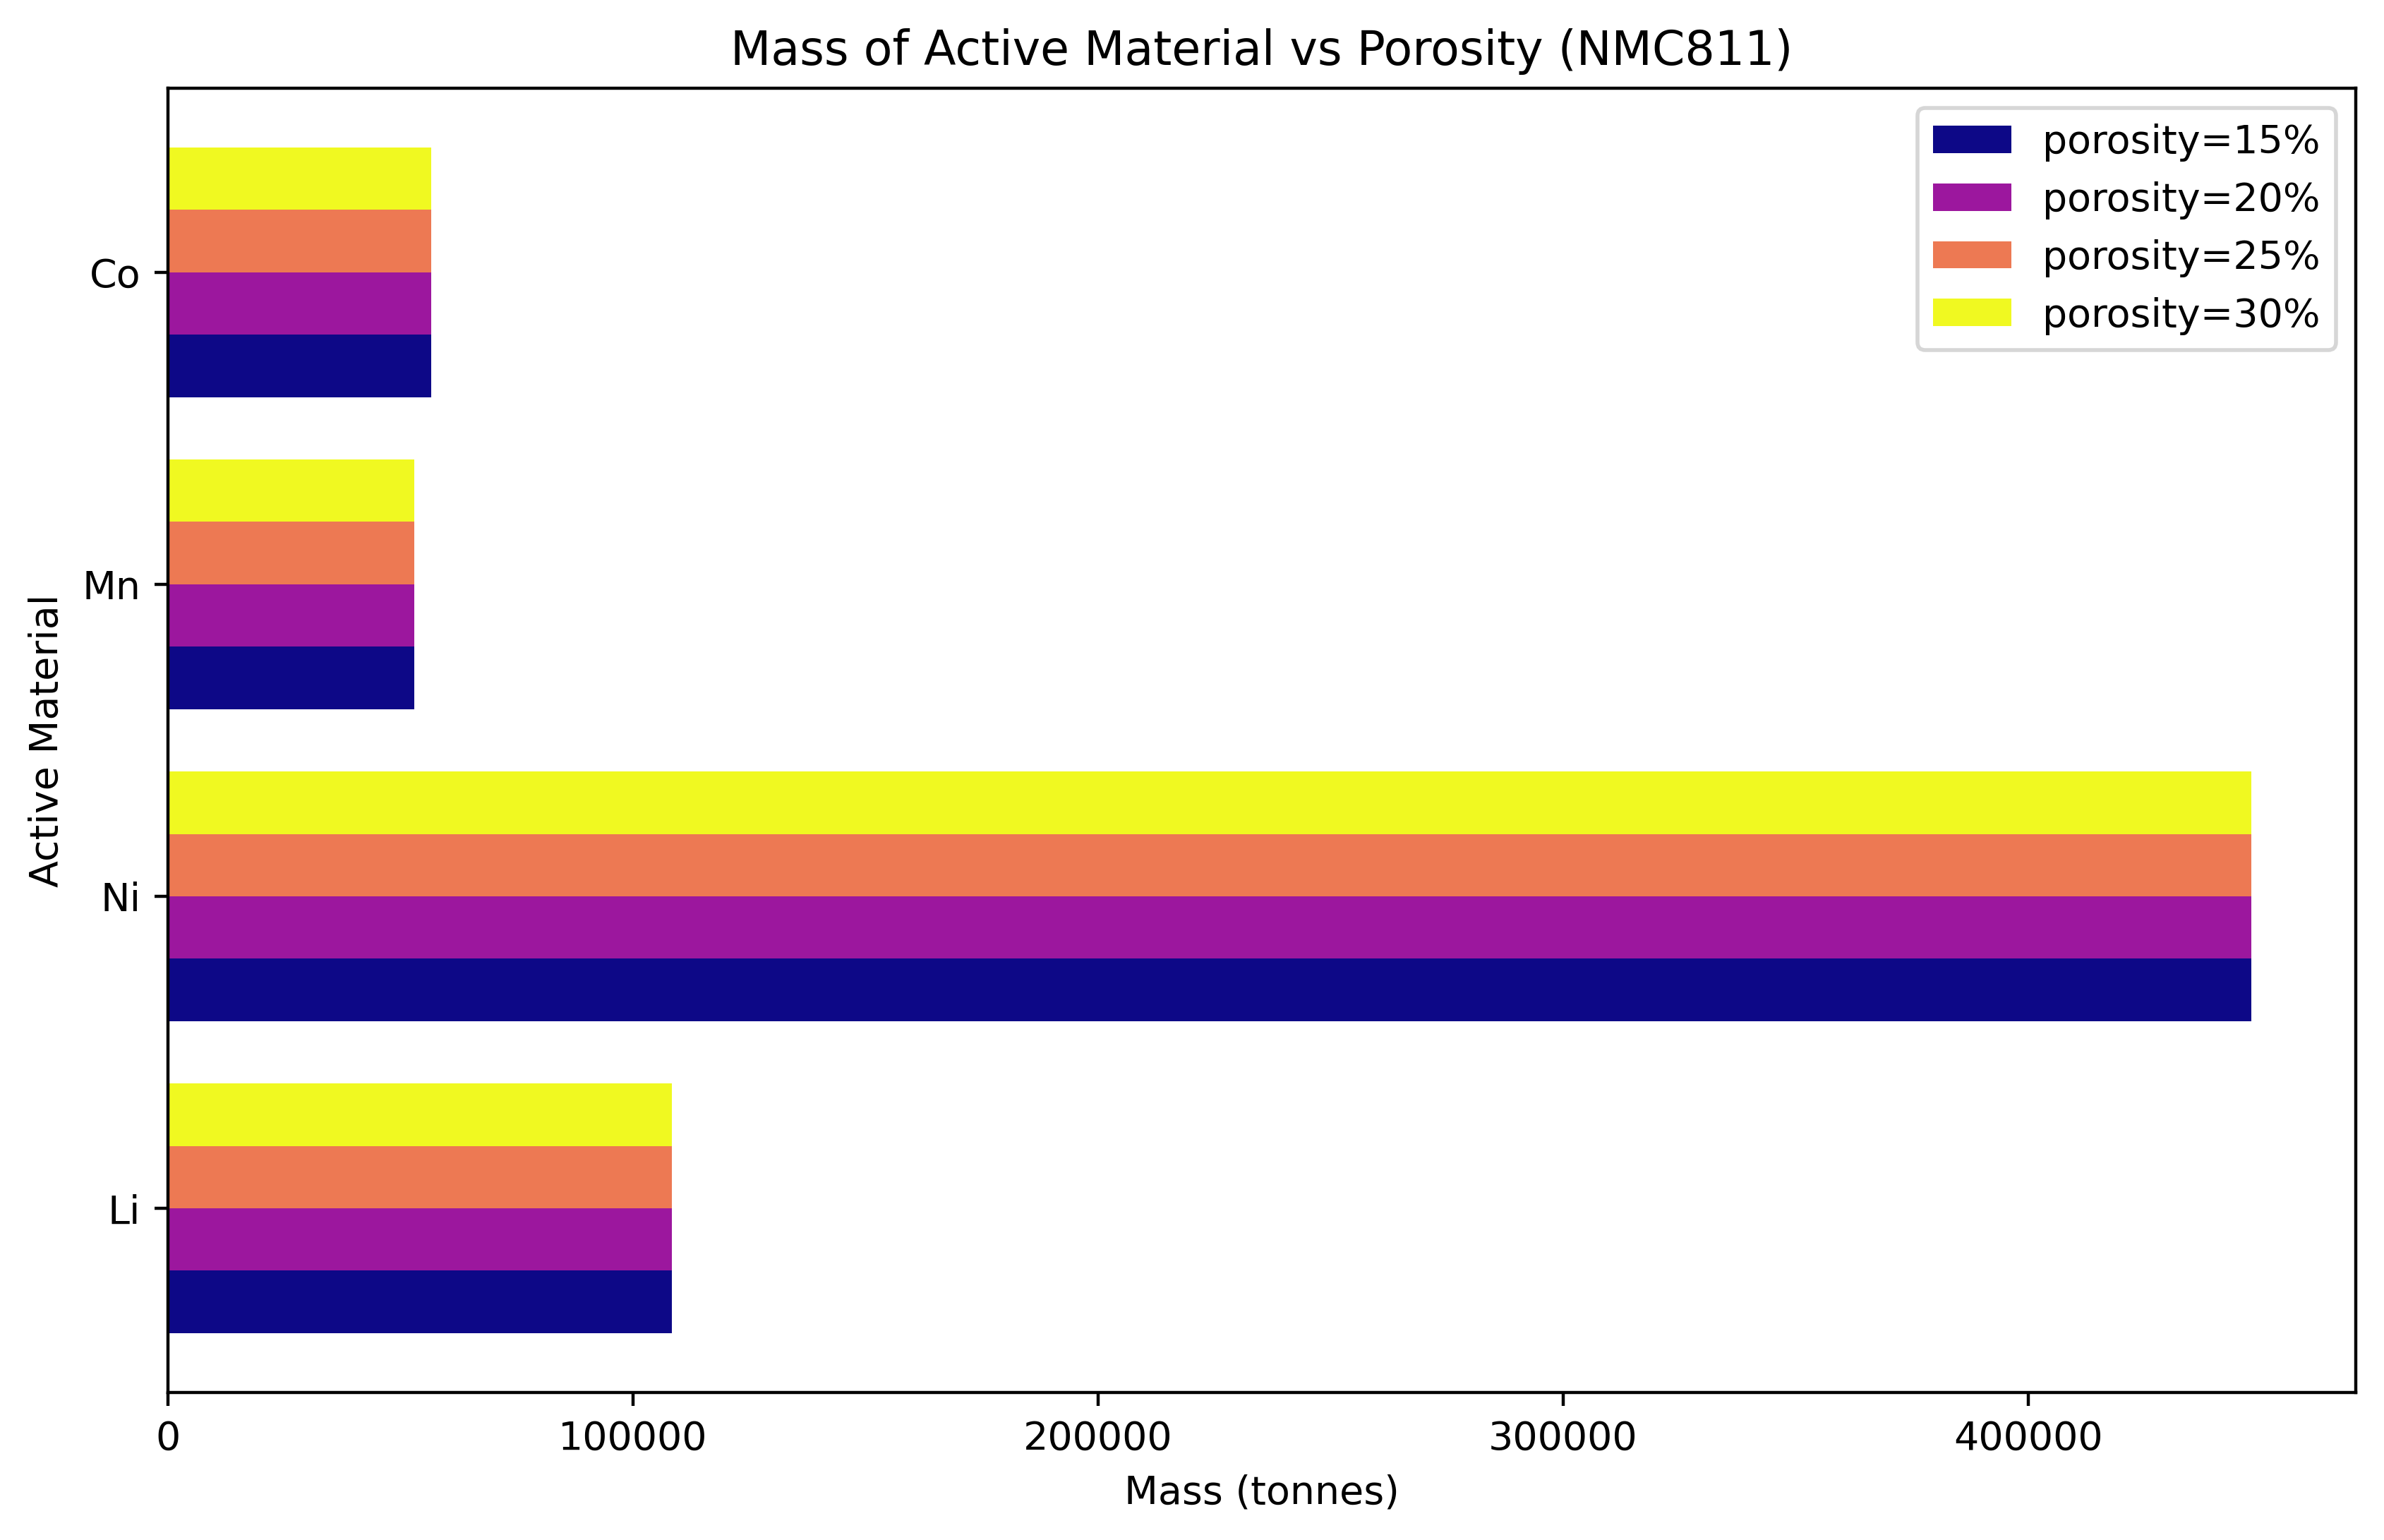

In [9]:
# input porosity, output critical mineral mass required (NMC811)

model = pybamm.lithium_ion.DFN()
parameter_values = pybamm.ParameterValues("Chen2020") # NMC811 parameter set
parameter_values["Current function [A]"] = 5
parameter_values["Positive electrode porosity"] = "[input]"

sim = pybamm.Simulation(model, parameter_values=parameter_values)

porosities = [0.15, 0.20, 0.25, 0.30]
av_voltages = []

for por in porosities:
    soln = sim.solve([0, 3600], inputs={"Positive electrode porosity": por})
    voltage = np.mean(soln["Positive electrode bulk open-circuit potential [V]"].data)  
    av_voltages.append(voltage)

plt.figure(dpi=400, figsize=(10, 6))
plt.plot(porosities, av_voltages, marker='o')
plt.xlabel("Positive electrode porosity")
plt.ylabel("Positive electrode bulk open-circuit potential [V]")
plt.title("Porosity vs OCV")
plt.grid(True)
plt.show()

plt.figure(dpi=400, figsize=(10, 6))
from matplotlib import colormaps as cmap
cmap = plt.cm.plasma
colors = cmap(np.linspace(0,1,len(av_voltages)))
names = ['Li', 'Ni', 'Mn', 'Co']
for i, (voltage, porosity, color) in enumerate(zip(av_voltages,porosities,colors)): # i is the enumerate index, (voltage,porosity,color) each gets asigned the corresponding tuple value from zip
    mass = AM_calc(1000, voltage, 811) # CHANGE CHEMISTRY 
    y_pos = np.arange(len(names)) + i*0.2
    plt.barh(y_pos, mass, color=color, height = 0.2, label = f'porosity={porosity*100:.0f}%') 
    print(f'cath. thickness = {(parameter_values["Positive electrode thickness [m]"])*1000000}um')
    # print(f'cath. thickness = {(soln["Positive electrode thickness [m]"].data)*1000000}um') error because thickness isn't a variable in DFN but a parameter in Chen2020

plt.yticks(np.arange(len(names)) + 0.3, names)
plt.legend()
plt.xlabel('Mass (tonnes)')
plt.ylabel('Active Material')
plt.title('Mass of Active Material vs Porosity (NMC811)') 
# plt.grid(axis='x')
# ax = plt.gca()  # Get the current axes
# ax.set_axisbelow(True)
# ax.grid(True)
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10000))
plt.show()





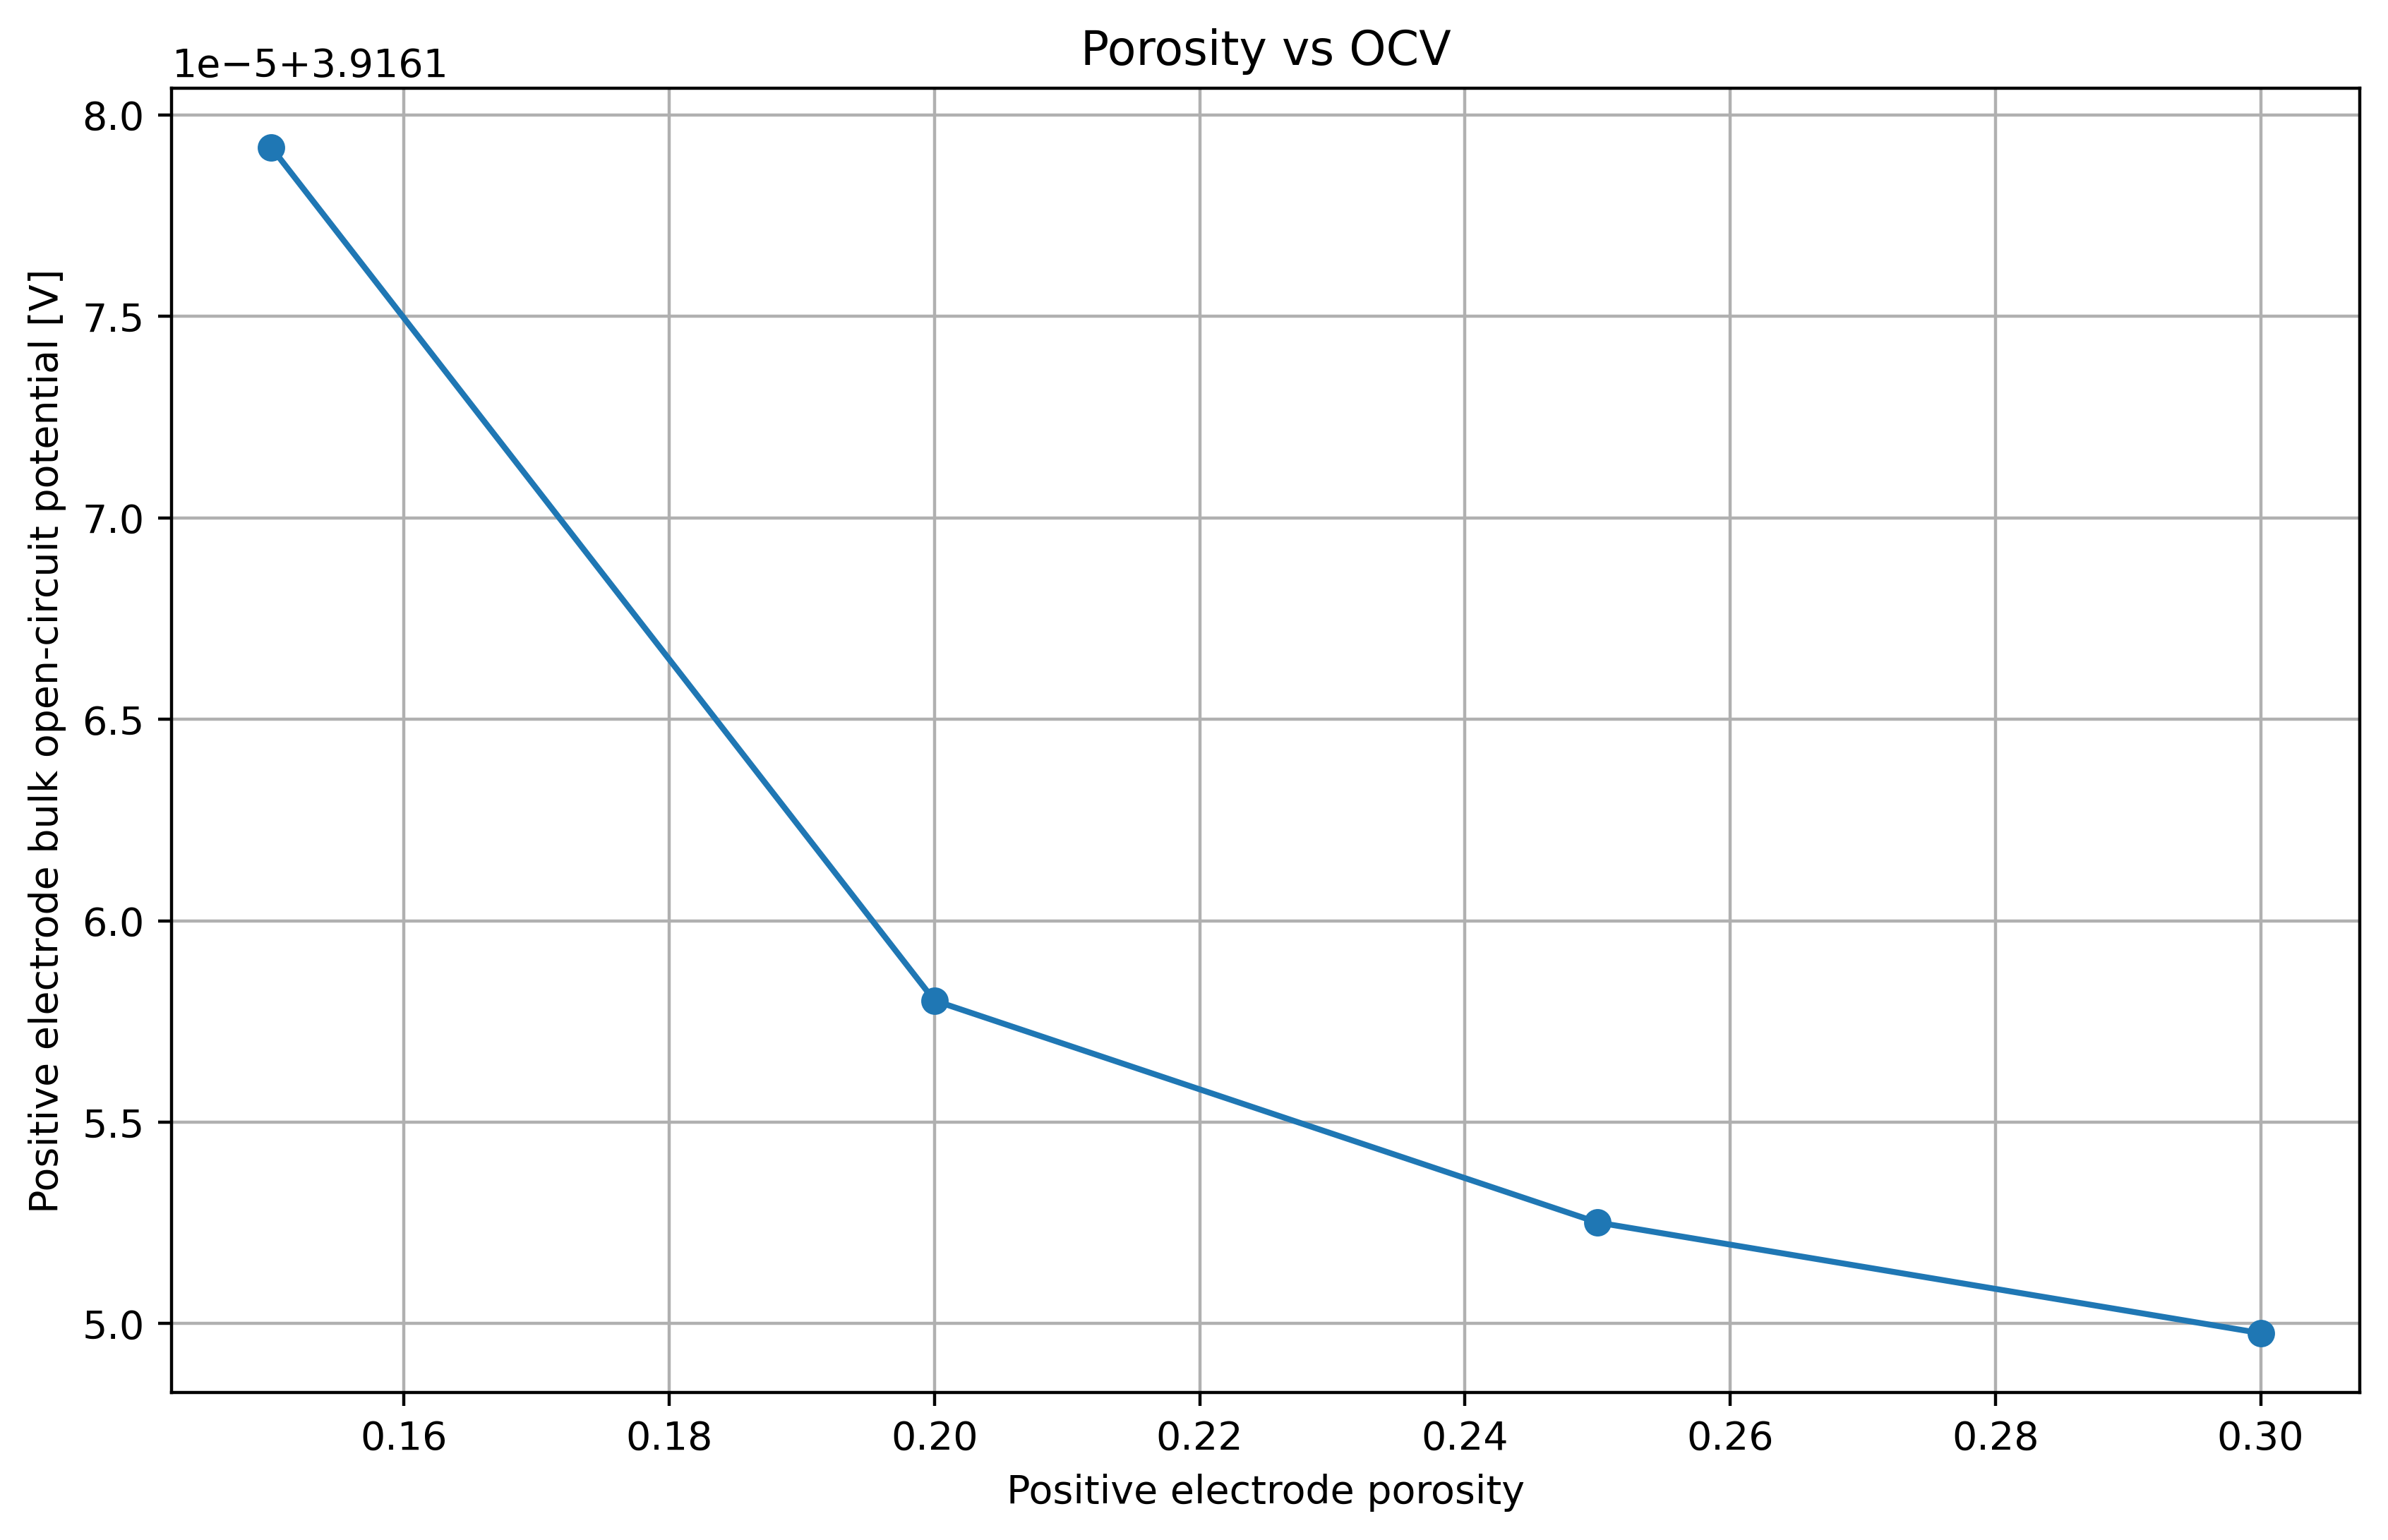

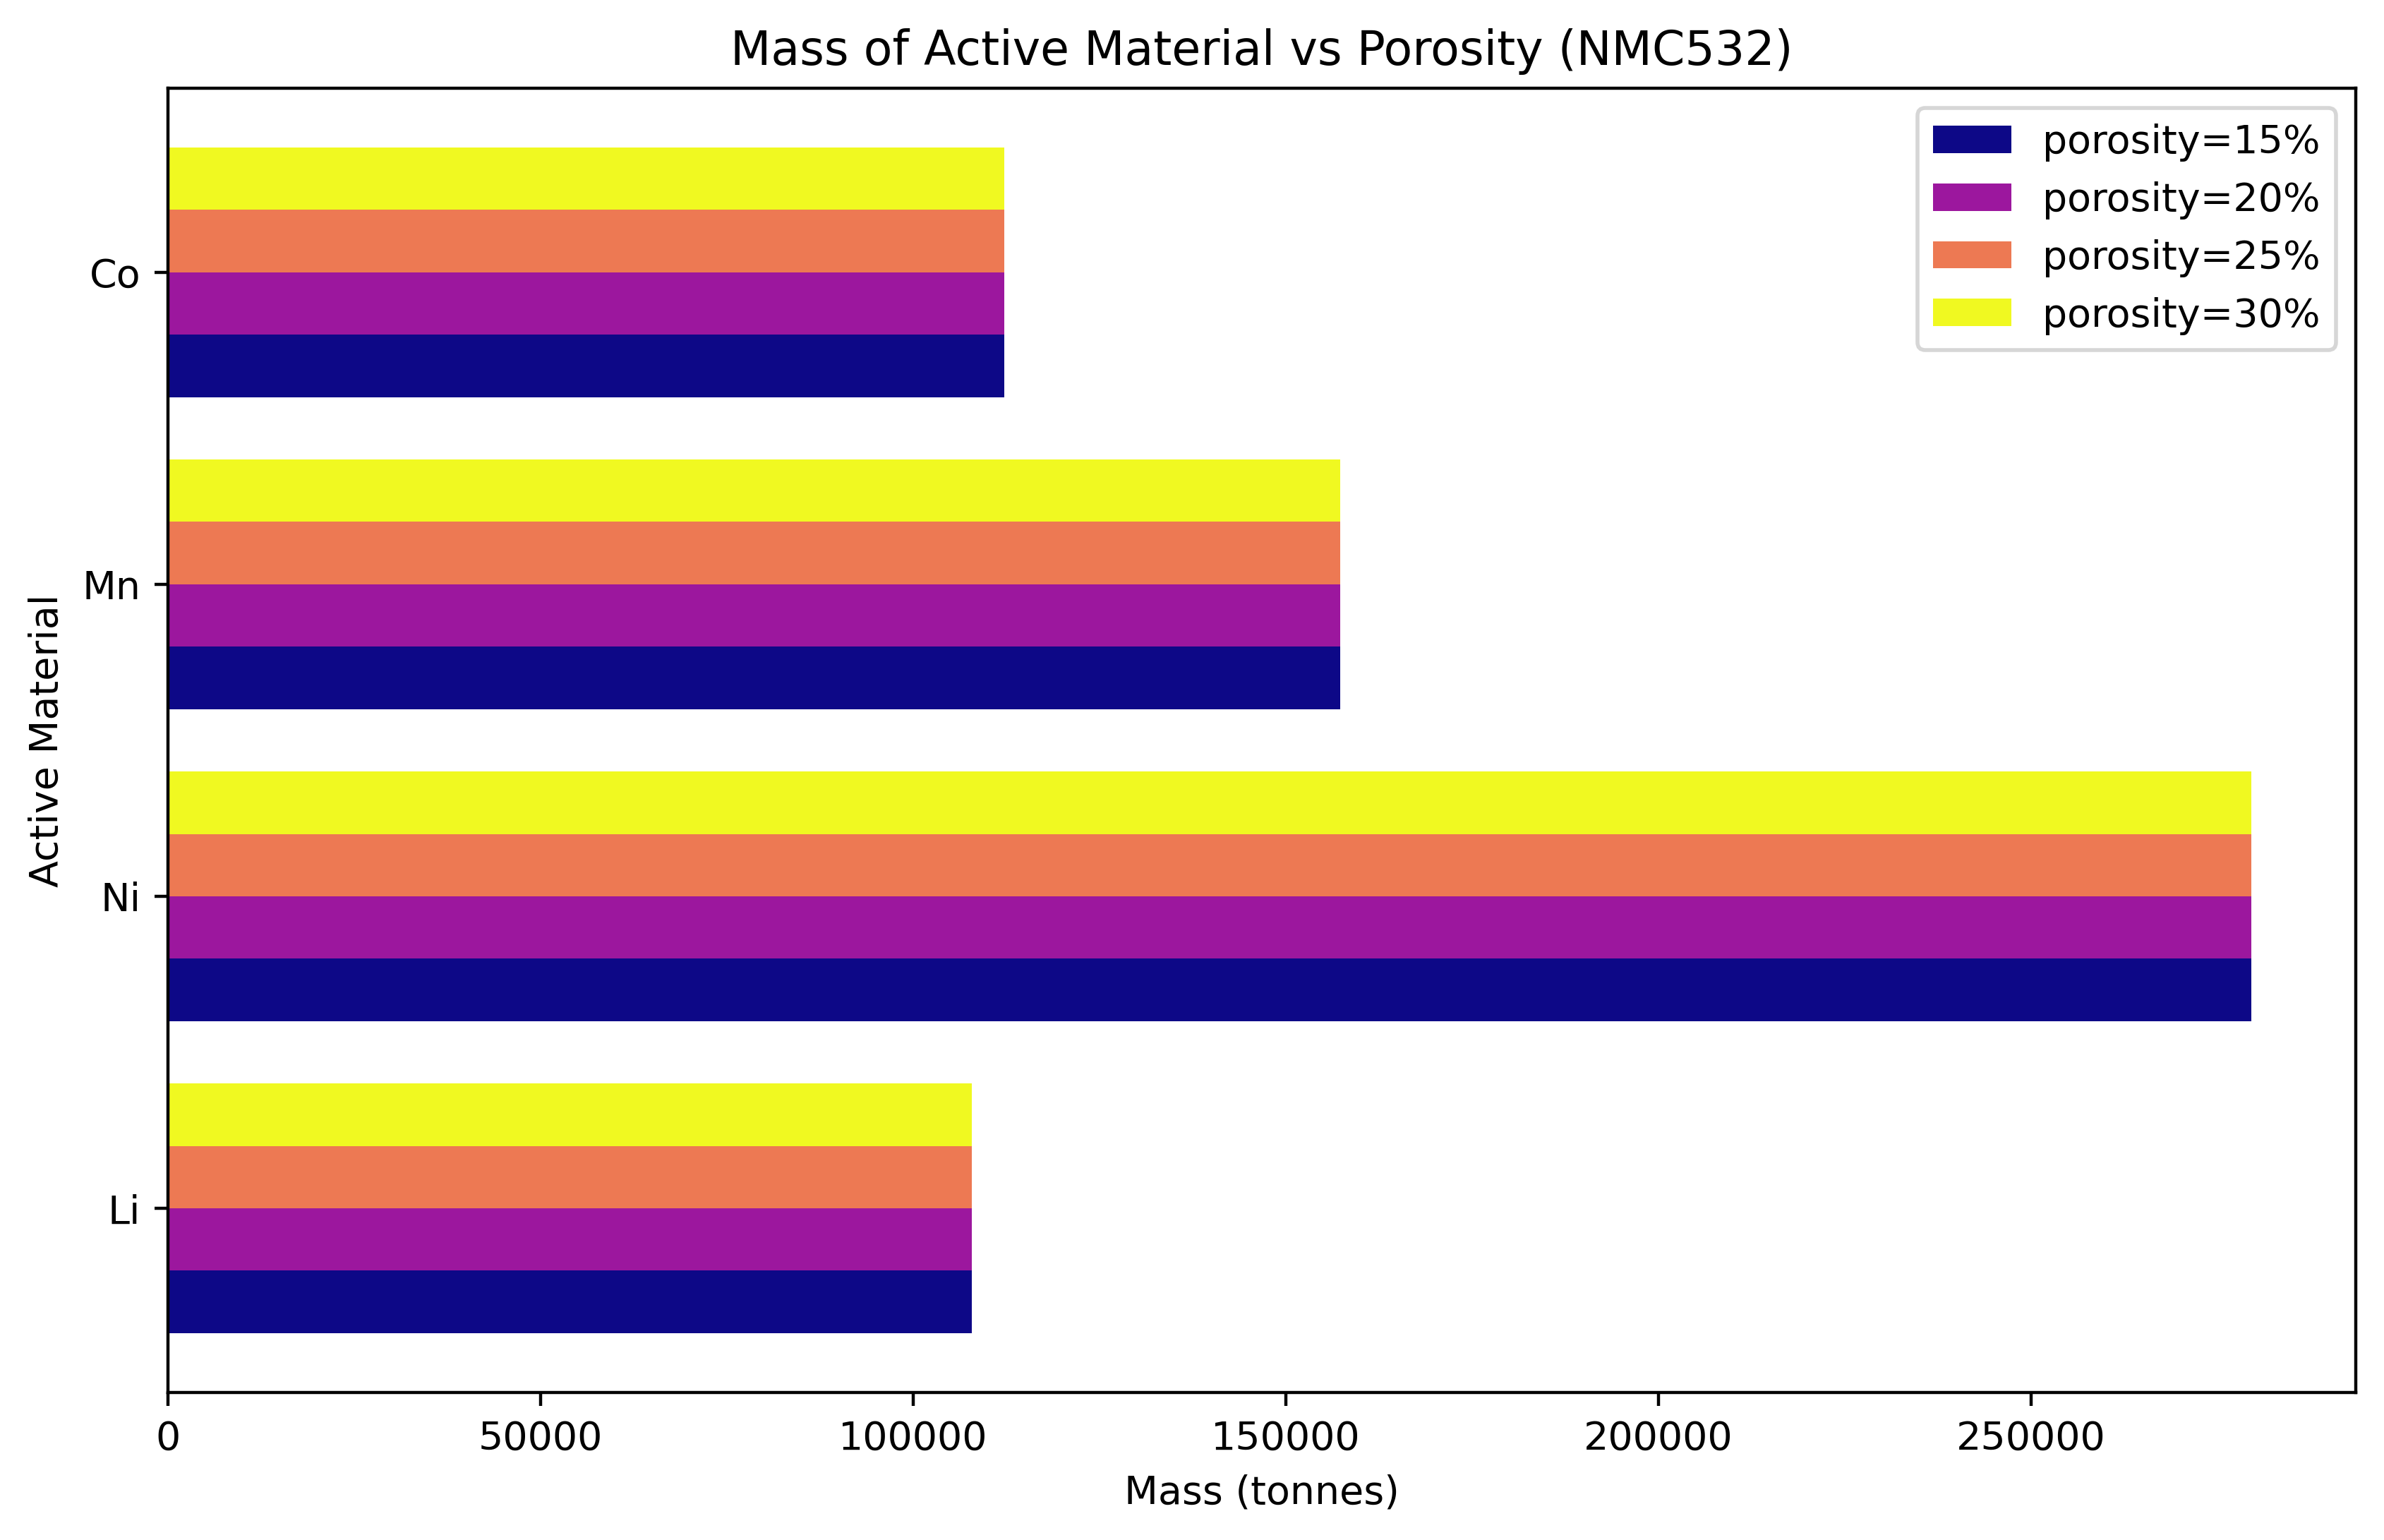

In [17]:
# NMC532 - input porosity, output critical mineral mass required 

model = pybamm.lithium_ion.DFN() 
parameter_values = pybamm.ParameterValues("Mohtat2020") # NMC532 parameter set 
parameter_values["Current function [A]"] = 5
parameter_values["Positive electrode porosity"] = "[input]"

solver = pybamm.CasadiSolver(rtol=1e-4, atol=1e-6) # loosening tolerances to accomidate high current draw and unrealistically low porosities 

porosities = [0.15, 0.20, 0.25, 0.30]
av_voltages = []

for por in porosities:
    soln = sim.solve([0, 3600], inputs={"Positive electrode porosity": por}, initial_soc=1.0)
    voltage = np.mean(soln["Positive electrode bulk open-circuit potential [V]"].data)  # nominal voltage
    av_voltages.append(voltage)

plt.figure(dpi=400, figsize=(10, 6))
plt.plot(porosities, av_voltages, marker='o')
plt.xlabel("Positive electrode porosity")
plt.ylabel("Positive electrode bulk open-circuit potential [V]")
plt.title("Porosity vs OCV")
plt.grid(True)
plt.show()

plt.figure(dpi=400, figsize=(10, 6))
from matplotlib import colormaps as cmap
cmap = plt.cm.plasma
colors = cmap(np.linspace(0,1,len(av_voltages)))
names = ['Li', 'Ni', 'Mn', 'Co']
for i, (voltage, porosity, color) in enumerate(zip(av_voltages,porosities,colors)): # i is the enumerate index, (voltage,porosity,color) each gets asigned the corresponding tuple value from zip
    mass = AM_calc(1000, voltage, 532) # CHANGE CHEMISTRY 
    y_pos = np.arange(len(names)) + i*0.2
    plt.barh(y_pos, mass, color=color, height = 0.2, label = f'porosity={porosity*100:.0f}%') 

plt.yticks(np.arange(len(names)) + 0.3, names)
plt.legend()
plt.xlabel('Mass (tonnes)')
plt.ylabel('Active Material')
plt.title('Mass of Active Material vs Porosity (NMC532)')
plt.show()


At t = 576.211 and h = 3.45069e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 285.302 and h = 2.57702e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 139.848 and h = 6.02513e-21, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 67.1204 and h = 3.88595e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 576.211 and h = 1.79081e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 285.302 and h = 1.89293e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 139.847 and h = 1.336e-25, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 67.1202 and h = 8.85124e-21, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 576.211 and h = 1.92009e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 285.302 and h = 6.77626e-18, the corrector convergence failed repeatedly or with |h| = hmin.
At

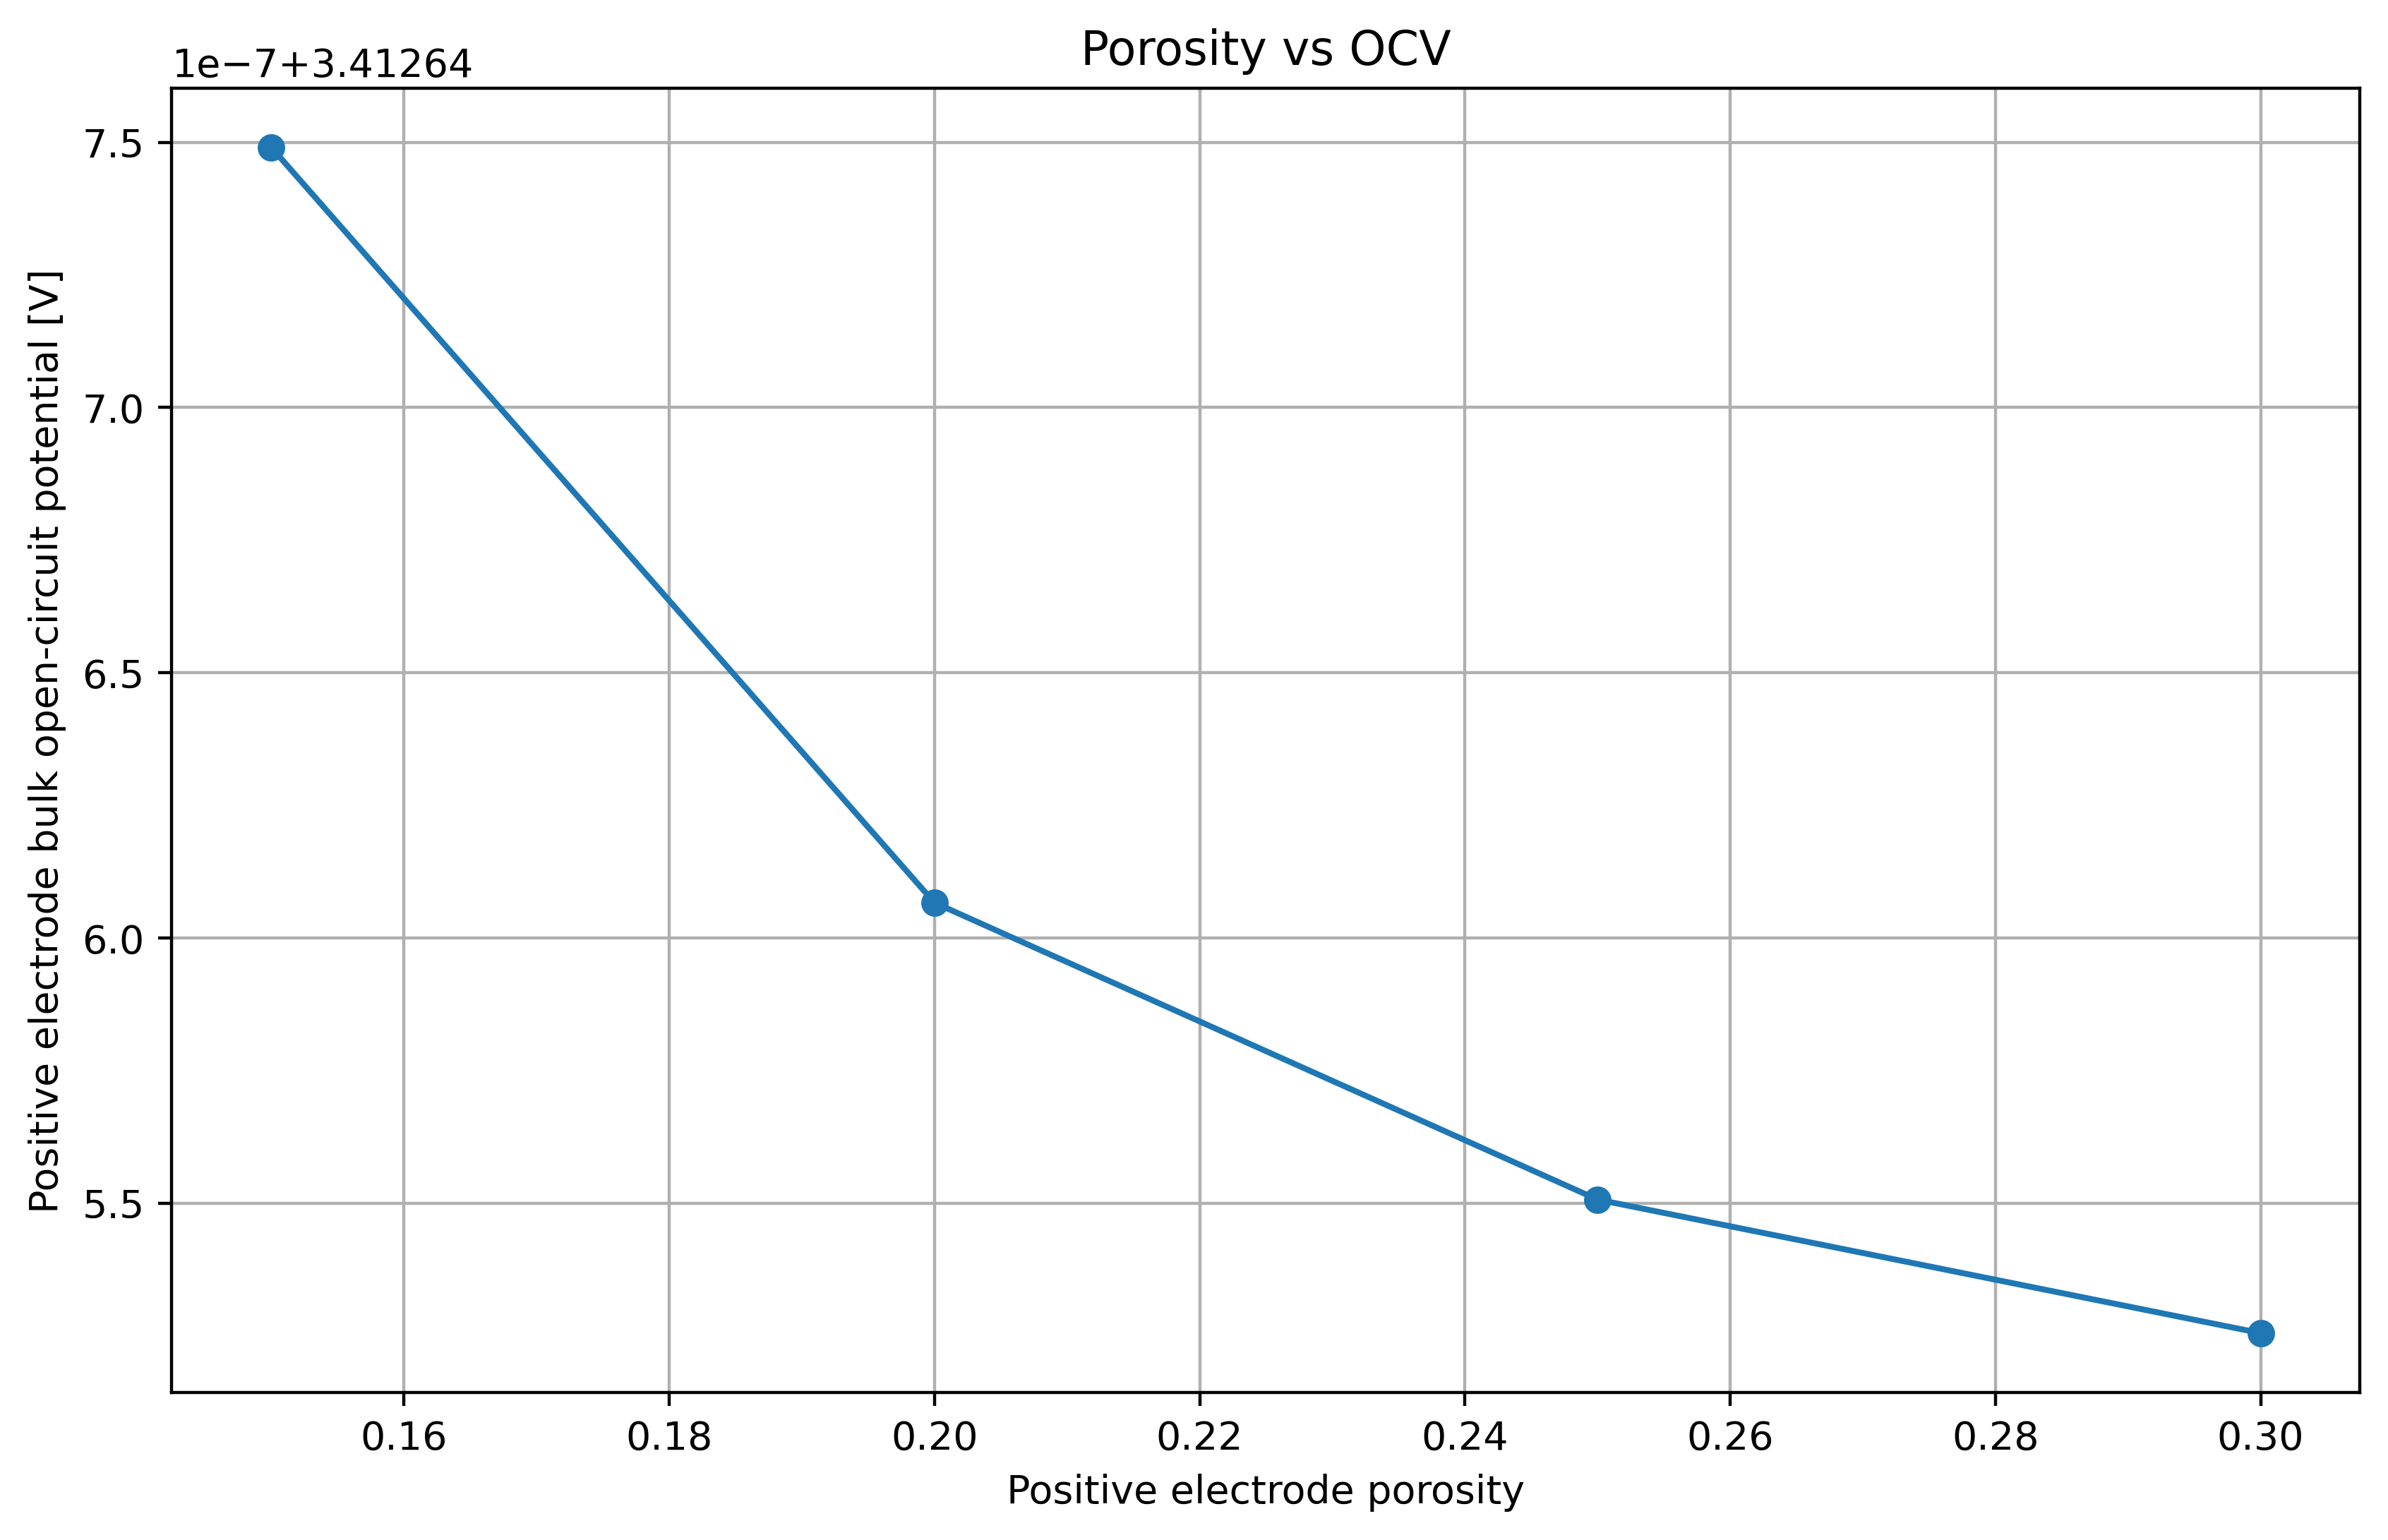

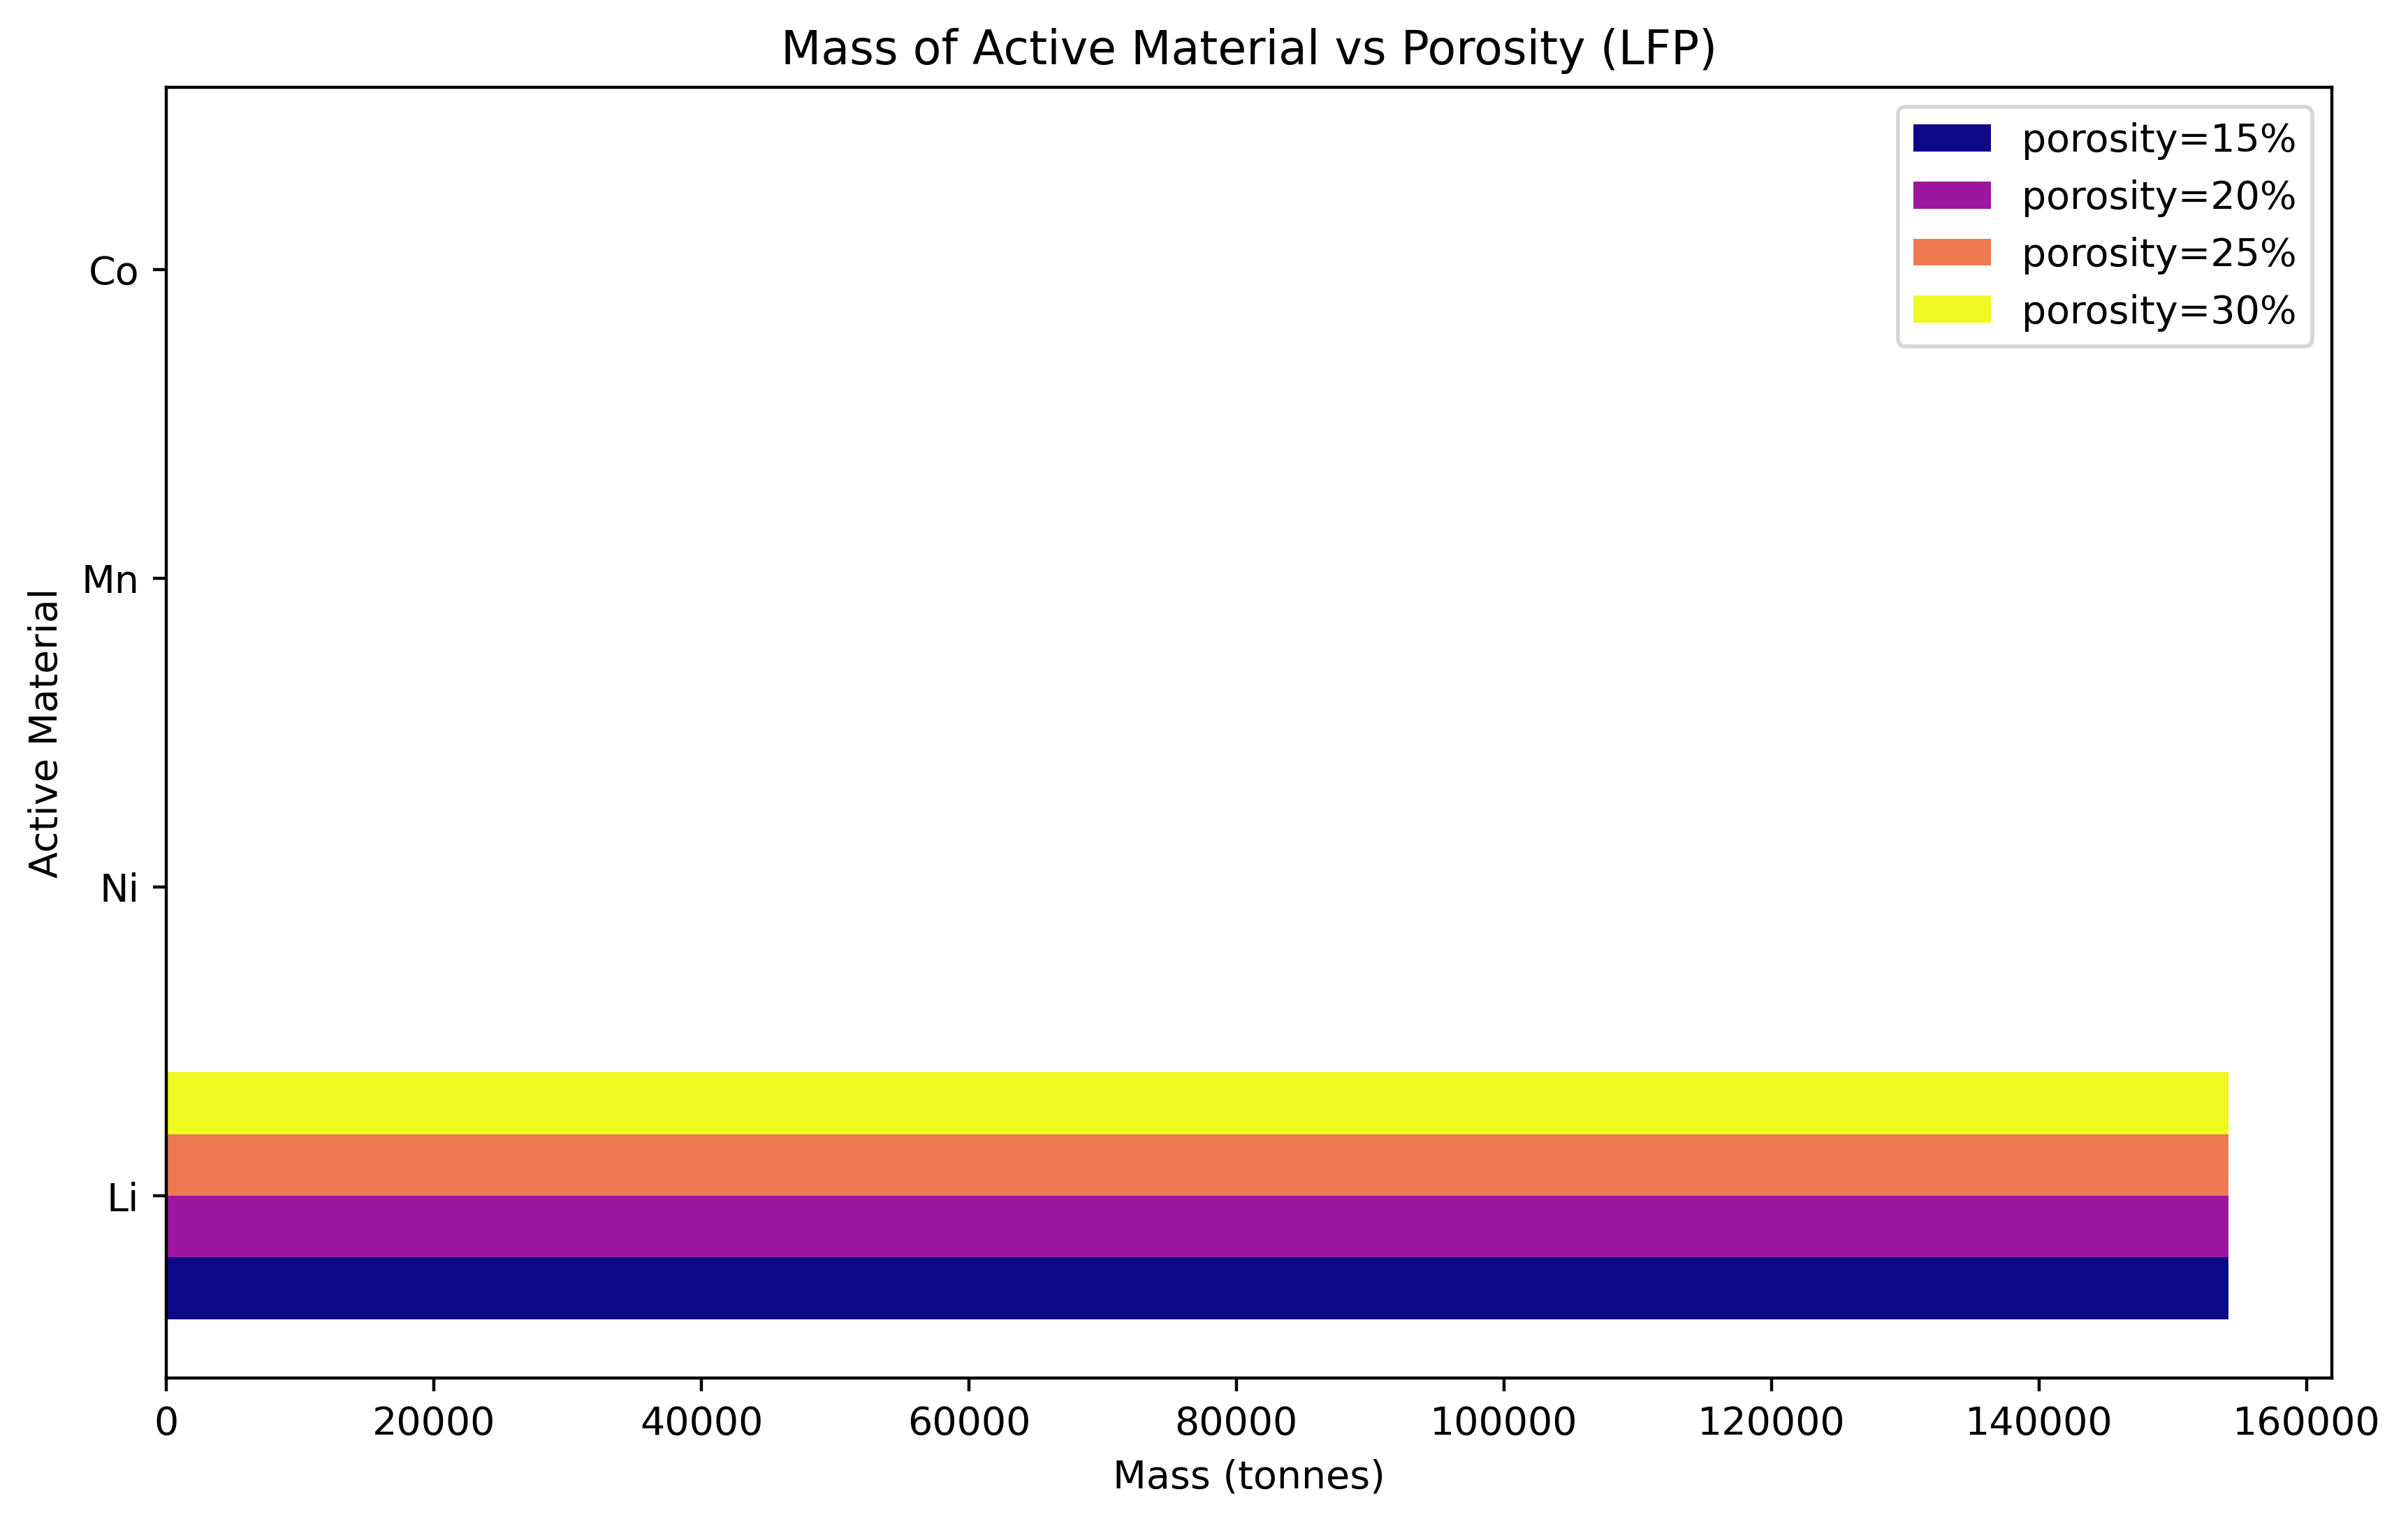

In [18]:
# LFP - input porosity, output critical mineral mass required 


model = pybamm.lithium_ion.DFN() 
parameter_values = pybamm.ParameterValues("Prada2013") # LFP parameter set 
parameter_values["Current function [A]"] = 5
parameter_values["Positive electrode porosity"] = "[input]"

solver = pybamm.CasadiSolver(rtol=1e-4, atol=1e-6) # loosening tolerances to accomidate high current draw and unrealistically low porosities 
sim = pybamm.Simulation(model, parameter_values=parameter_values)

porosities = [0.15, 0.20, 0.25, 0.30]
av_voltages = []

for por in porosities:
    soln = sim.solve([0, 3600], inputs={"Positive electrode porosity": por})
    voltage = np.mean(soln["Positive electrode bulk open-circuit potential [V]"].data)  # nominal voltage
    av_voltages.append(voltage)

plt.figure(dpi=400, figsize=(10, 6))
plt.plot(porosities, av_voltages, marker='o')
plt.xlabel("Positive electrode porosity")
plt.ylabel("Positive electrode bulk open-circuit potential [V]")
plt.title("Porosity vs OCV")
plt.grid(True)
plt.show()

plt.figure(dpi=400, figsize=(10, 6))
from matplotlib import colormaps as cmap
cmap = plt.cm.plasma
colors = cmap(np.linspace(0,1,len(av_voltages)))
names = ['Li', 'Ni', 'Mn', 'Co']
for i, (voltage, porosity, color) in enumerate(zip(av_voltages,porosities,colors)): # i is the enumerate index, (voltage,porosity,color) each gets asigned the corresponding tuple value from zip
    mass = AM_calc(1000, voltage, "LFP") # CHANGE CHEMISTRY 
    y_pos = np.arange(len(names)) + i*0.2
    plt.barh(y_pos, mass, color=color, height = 0.2, label = f'porosity={porosity*100:.0f}%') 

plt.yticks(np.arange(len(names)) + 0.3, names)
plt.legend()
plt.xlabel('Mass (tonnes)')
plt.ylabel('Active Material')
plt.title('Mass of Active Material vs Porosity (LFP)')
plt.show()

Vary cathode particle size, output mass of critical mineral required for 1. NMC811, 2. NMC622 

Solving for radius = 5 µm
Solving for radius = 10 µm


At t = 92.8215 and h = 4.00159e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 92.8215, , mxstep steps taken before reaching tout.
At t = 92.8215 and h = 8.3356e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 20.0943, , mxstep steps taken before reaching tout.
At t = 20.0943, , mxstep steps taken before reaching tout.
At t = 1.34426, , mxstep steps taken before reaching tout.
At t = 1.34427, , mxstep steps taken before reaching tout.
At t = 1.34427, , mxstep steps taken before reaching tout.
At t = 1.34427 and h = 1.70868e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.17239, , mxstep steps taken before reaching tout.
At t = 0.172387 and h = 3.19155e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.172391, , mxstep steps taken before reaching tout.
At t = 0.0259065, , mxstep steps taken before reaching tout.
At t = 0.0259043 and h = 2.21297e-15, the corrector convergence fa

Solving for radius = 15 µm


At t = 156.975 and h = 8.39411e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 156.975, , mxstep steps taken before reaching tout.
At t = 11.5207, , mxstep steps taken before reaching tout.
At t = 11.5207, , mxstep steps taken before reaching tout.
At t = 11.5207, , mxstep steps taken before reaching tout.
At t = 11.5207, , mxstep steps taken before reaching tout.
At t = 2.14574 and h = 4.99709e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 2.14574, , mxstep steps taken before reaching tout.
At t = 2.14574 and h = 5.78137e-14, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.973868, , mxstep steps taken before reaching tout.
At t = 0.387929, , mxstep steps taken before reaching tout.
At t = 0.0949618, , mxstep steps taken before reaching tout.
At t = 0.0949624, , mxstep steps taken before reaching tout.
At t = 0.0217187, , mxstep steps taken before reaching tout.
At t = 0.0217193, , mxstep steps taken befo

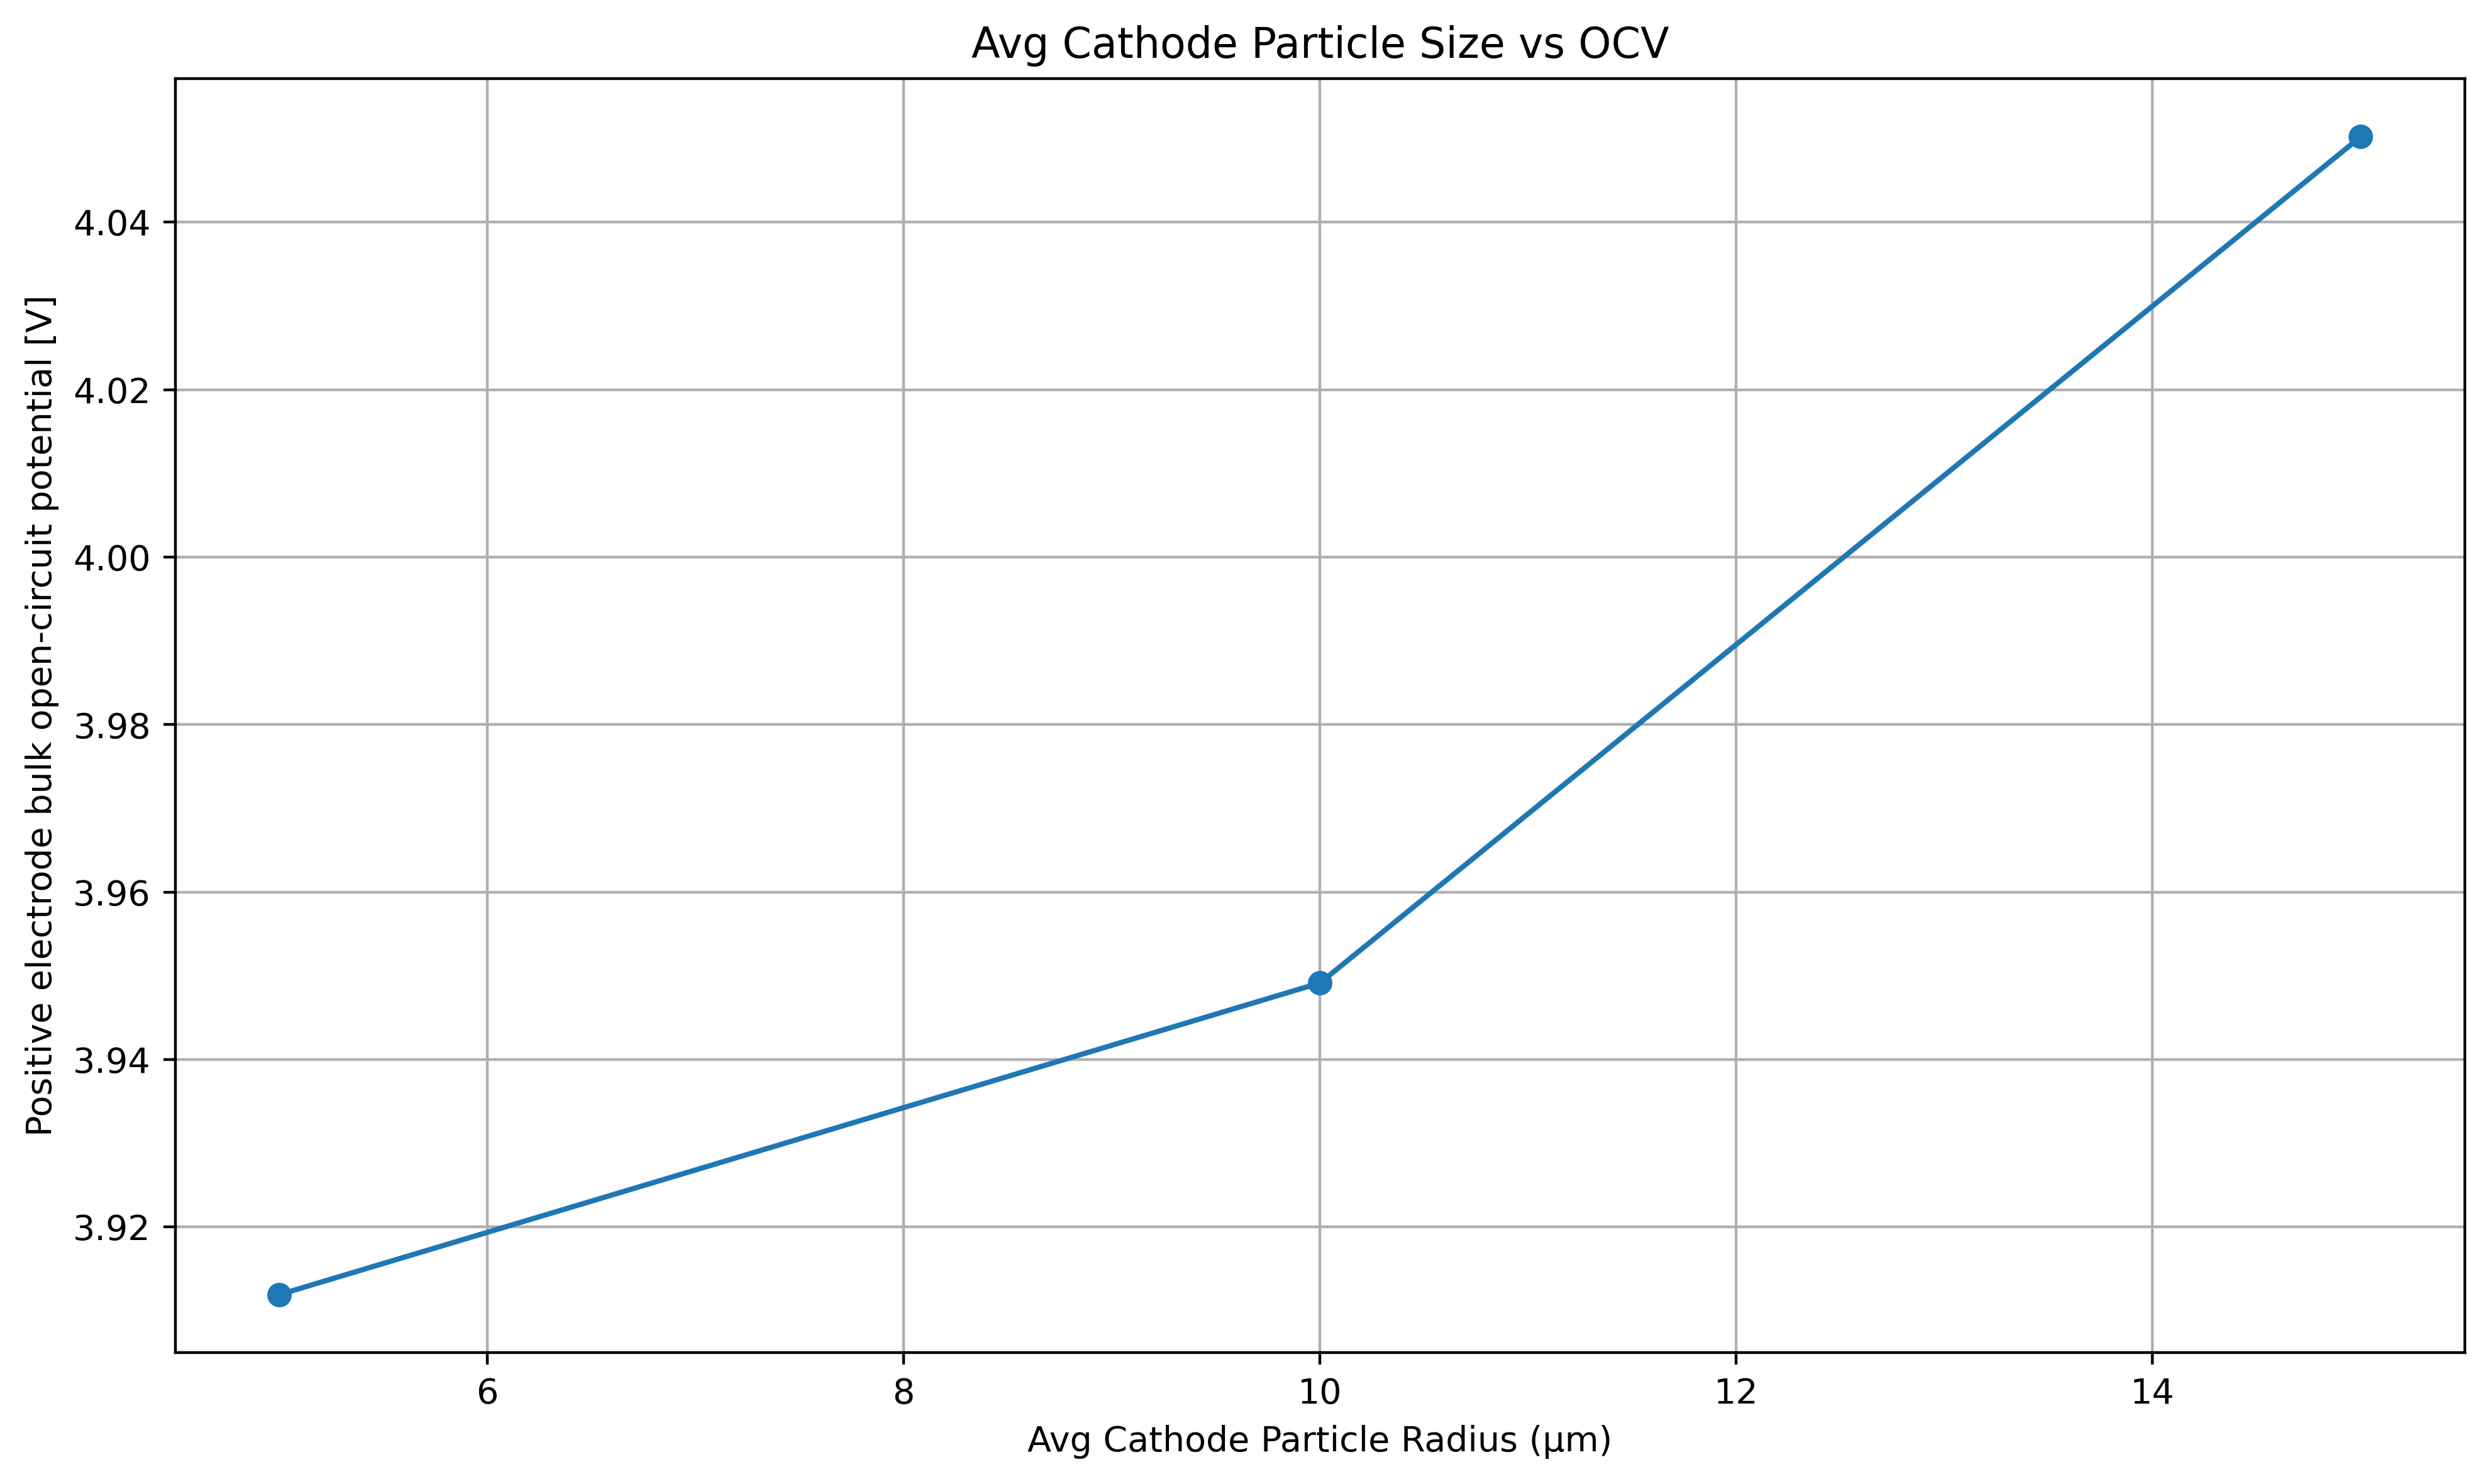

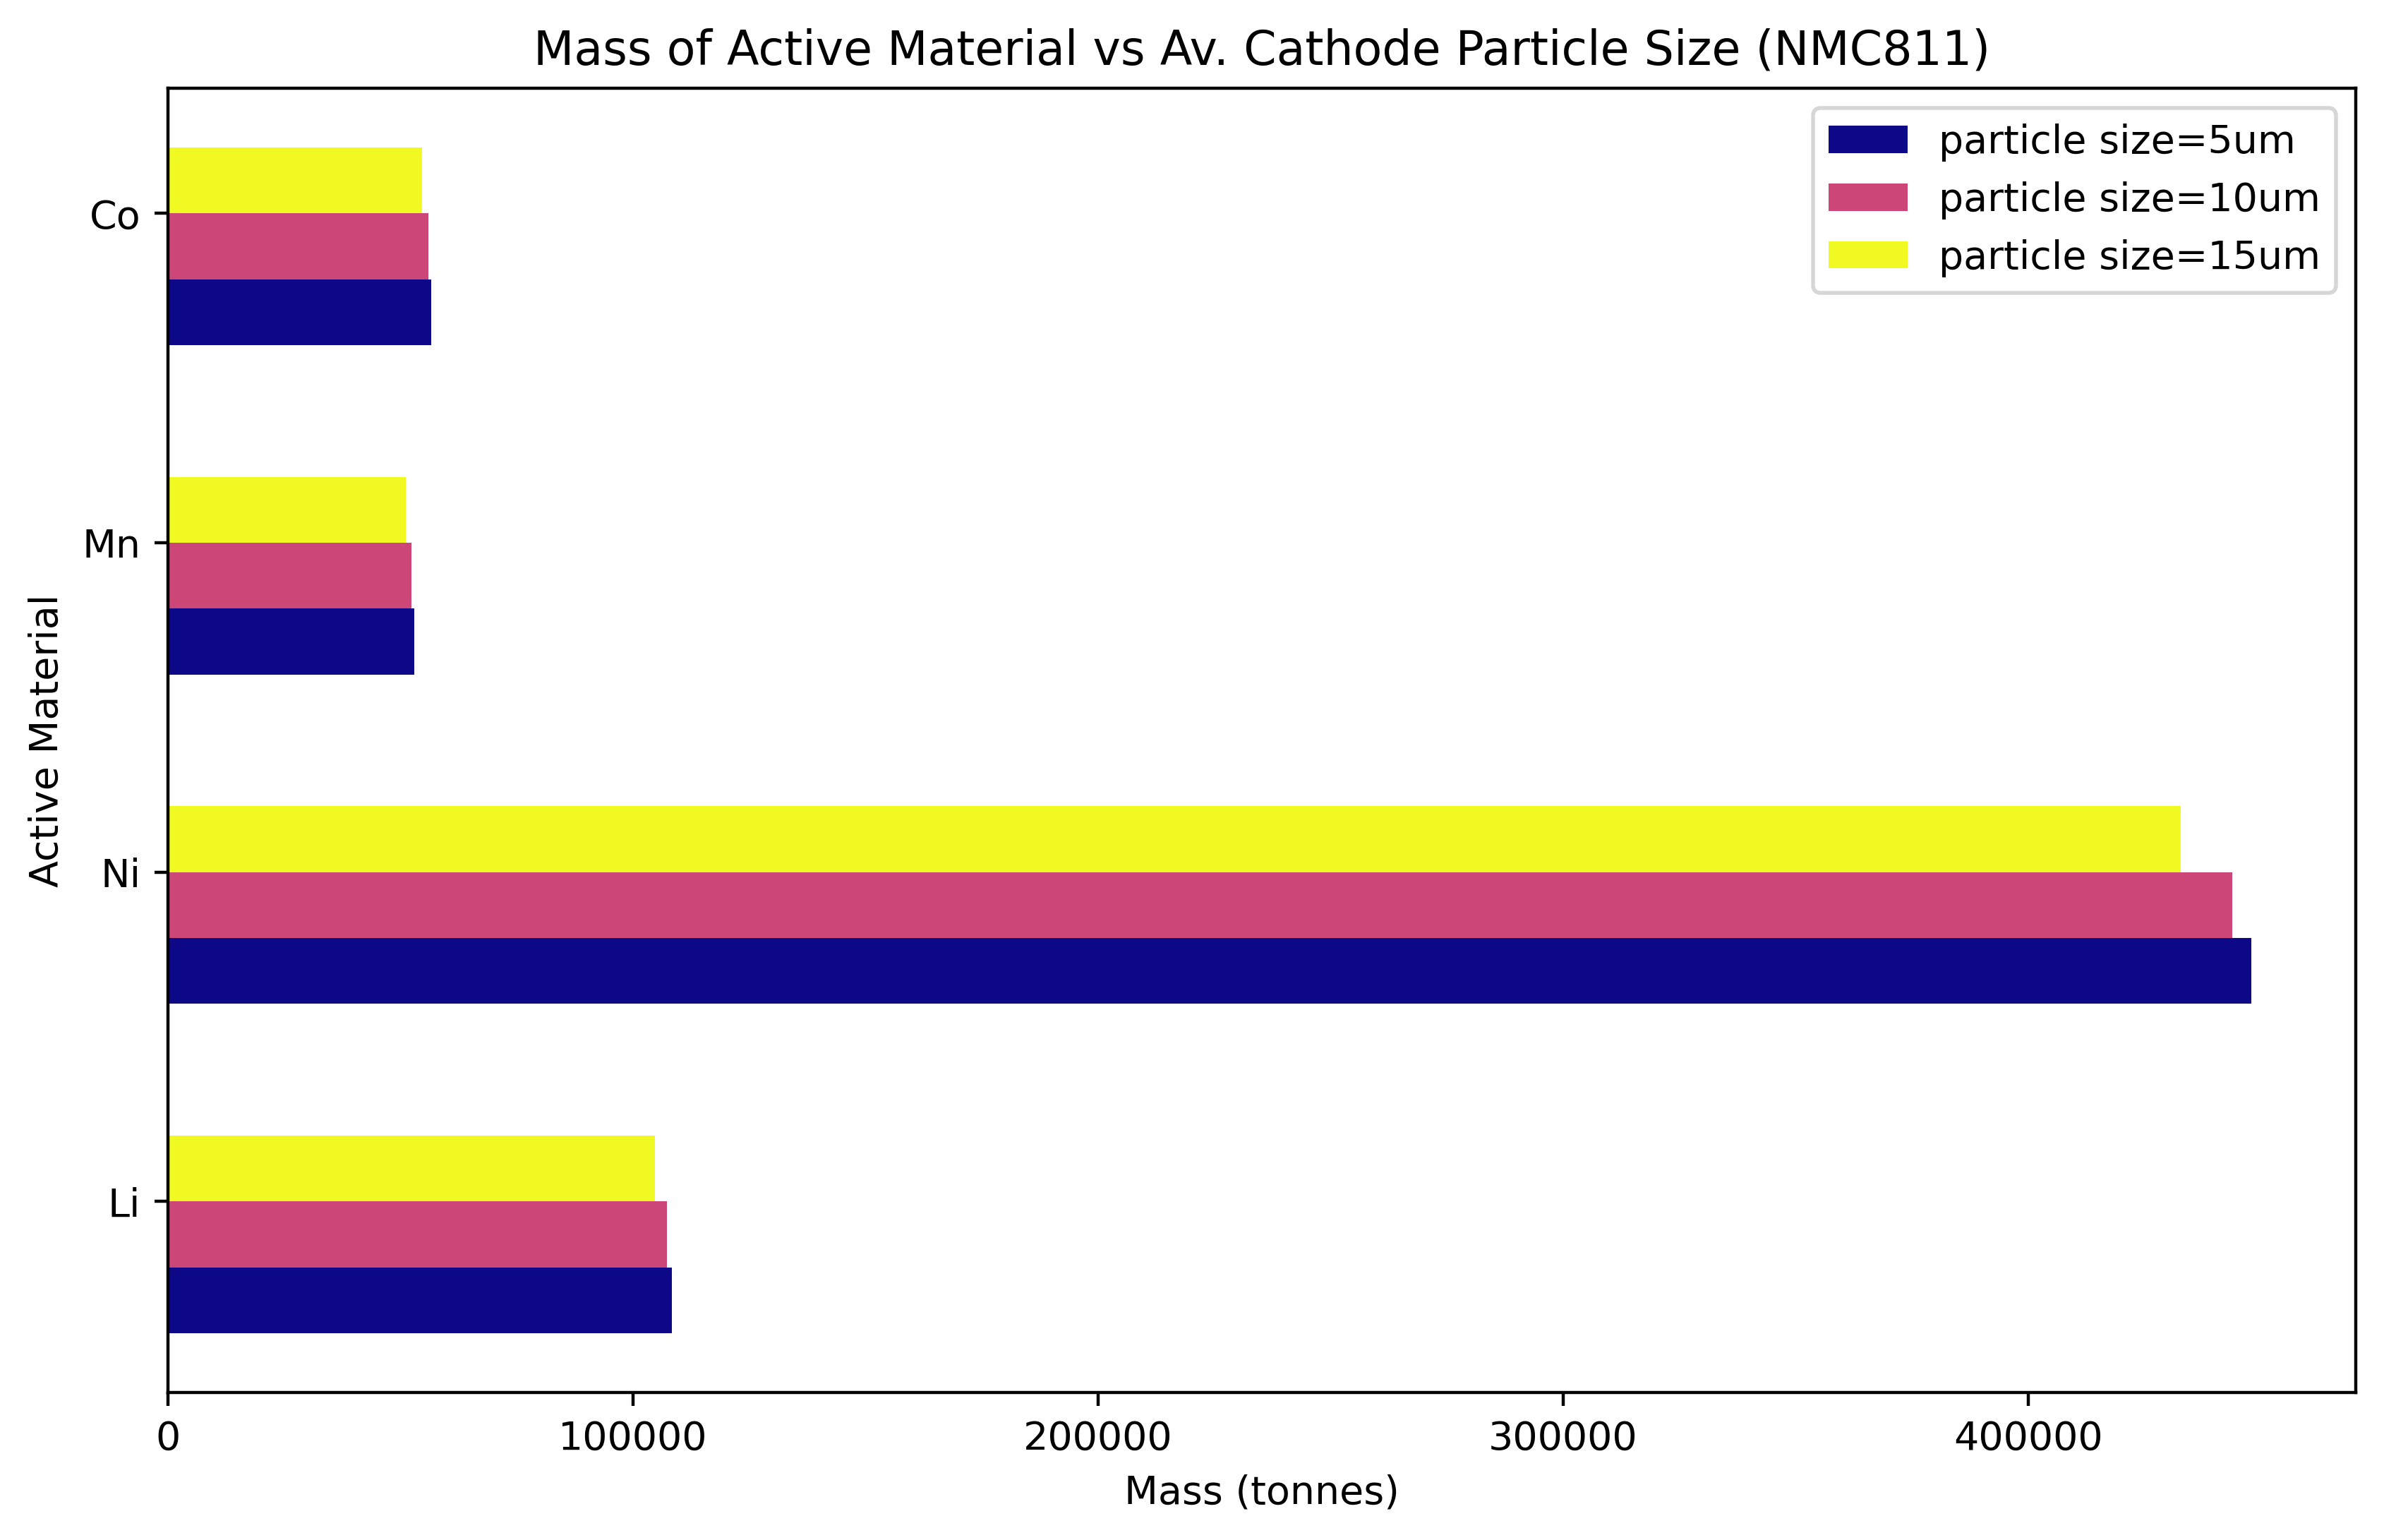

In [19]:
# vary cathode particle size, output mass critical mineral required (NMC811) 

particle_sizes_um = [5, 10, 15]
particle_sizes_m = [r * 1e-6 for r in particle_sizes_um]

av_voltages = []
for radius_m in particle_sizes_m:
    print(f"Solving for radius = {radius_m * 1e6:.0f} µm")

    try:
        # Set up model and parameters
        model = pybamm.lithium_ion.DFN()
        params = pybamm.ParameterValues("Chen2020")
        params.update({"Positive particle radius [m]": radius_m})

        # Use a more stable solver (Casadi-based)
        solver = pybamm.CasadiSolver(rtol=1e-6, atol=1e-8)
        
        # Build and run the simulation
        sim = pybamm.Simulation(model, parameter_values=params, solver=solver)
        solution = sim.solve([0, 3600])

        # Compute average voltage
        voltage = np.mean(solution["Positive electrode bulk open-circuit potential [V]"].data)
        av_voltages.append(voltage)

    except pybamm.SolverError as e:
        print(f"Solver failed for radius = {radius_m * 1e6:.0f} µm. Error: {e}")
        av_voltages.append(np.nan)  

# Plot the results
plt.figure(dpi=400, figsize=(10, 6))
plt.plot(particle_sizes_um, av_voltages, marker='o', linestyle='-', color='tab:blue')
plt.xlabel("Avg Cathode Particle Radius (µm)")
plt.ylabel("Positive electrode bulk open-circuit potential [V]")
plt.title("Avg Cathode Particle Size vs OCV")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(dpi=400, figsize=(10, 6))
from matplotlib import colormaps as cmap
cmap = plt.cm.plasma
colors = cmap(np.linspace(0,1,len(av_voltages)))
names = ['Li', 'Ni', 'Mn', 'Co']
for i, (voltage, size, color) in enumerate(zip(av_voltages,particle_sizes_um,colors)): # i is the enumerate index, (voltage,porosity,color) each gets asigned the corresponding tuple value from zip
    mass = AM_calc(1000, voltage, 811) # CHANGE CHEMISTRY 
    y_pos = np.arange(len(names)) + i*0.2
    plt.barh(y_pos, mass, color=color, height = 0.2, label = f'particle size={size}um') 

plt.yticks(np.arange(len(names)) + 0.3, names)
plt.legend()
plt.xlabel('Mass (tonnes)')
plt.ylabel('Active Material')
plt.title('Mass of Active Material vs Av. Cathode Particle Size (NMC811)')
plt.show()

Solving for radius = 5 µm
Solving for radius = 10 µm


At t = 294.657, , mxstep steps taken before reaching tout.


Solving for radius = 15 µm


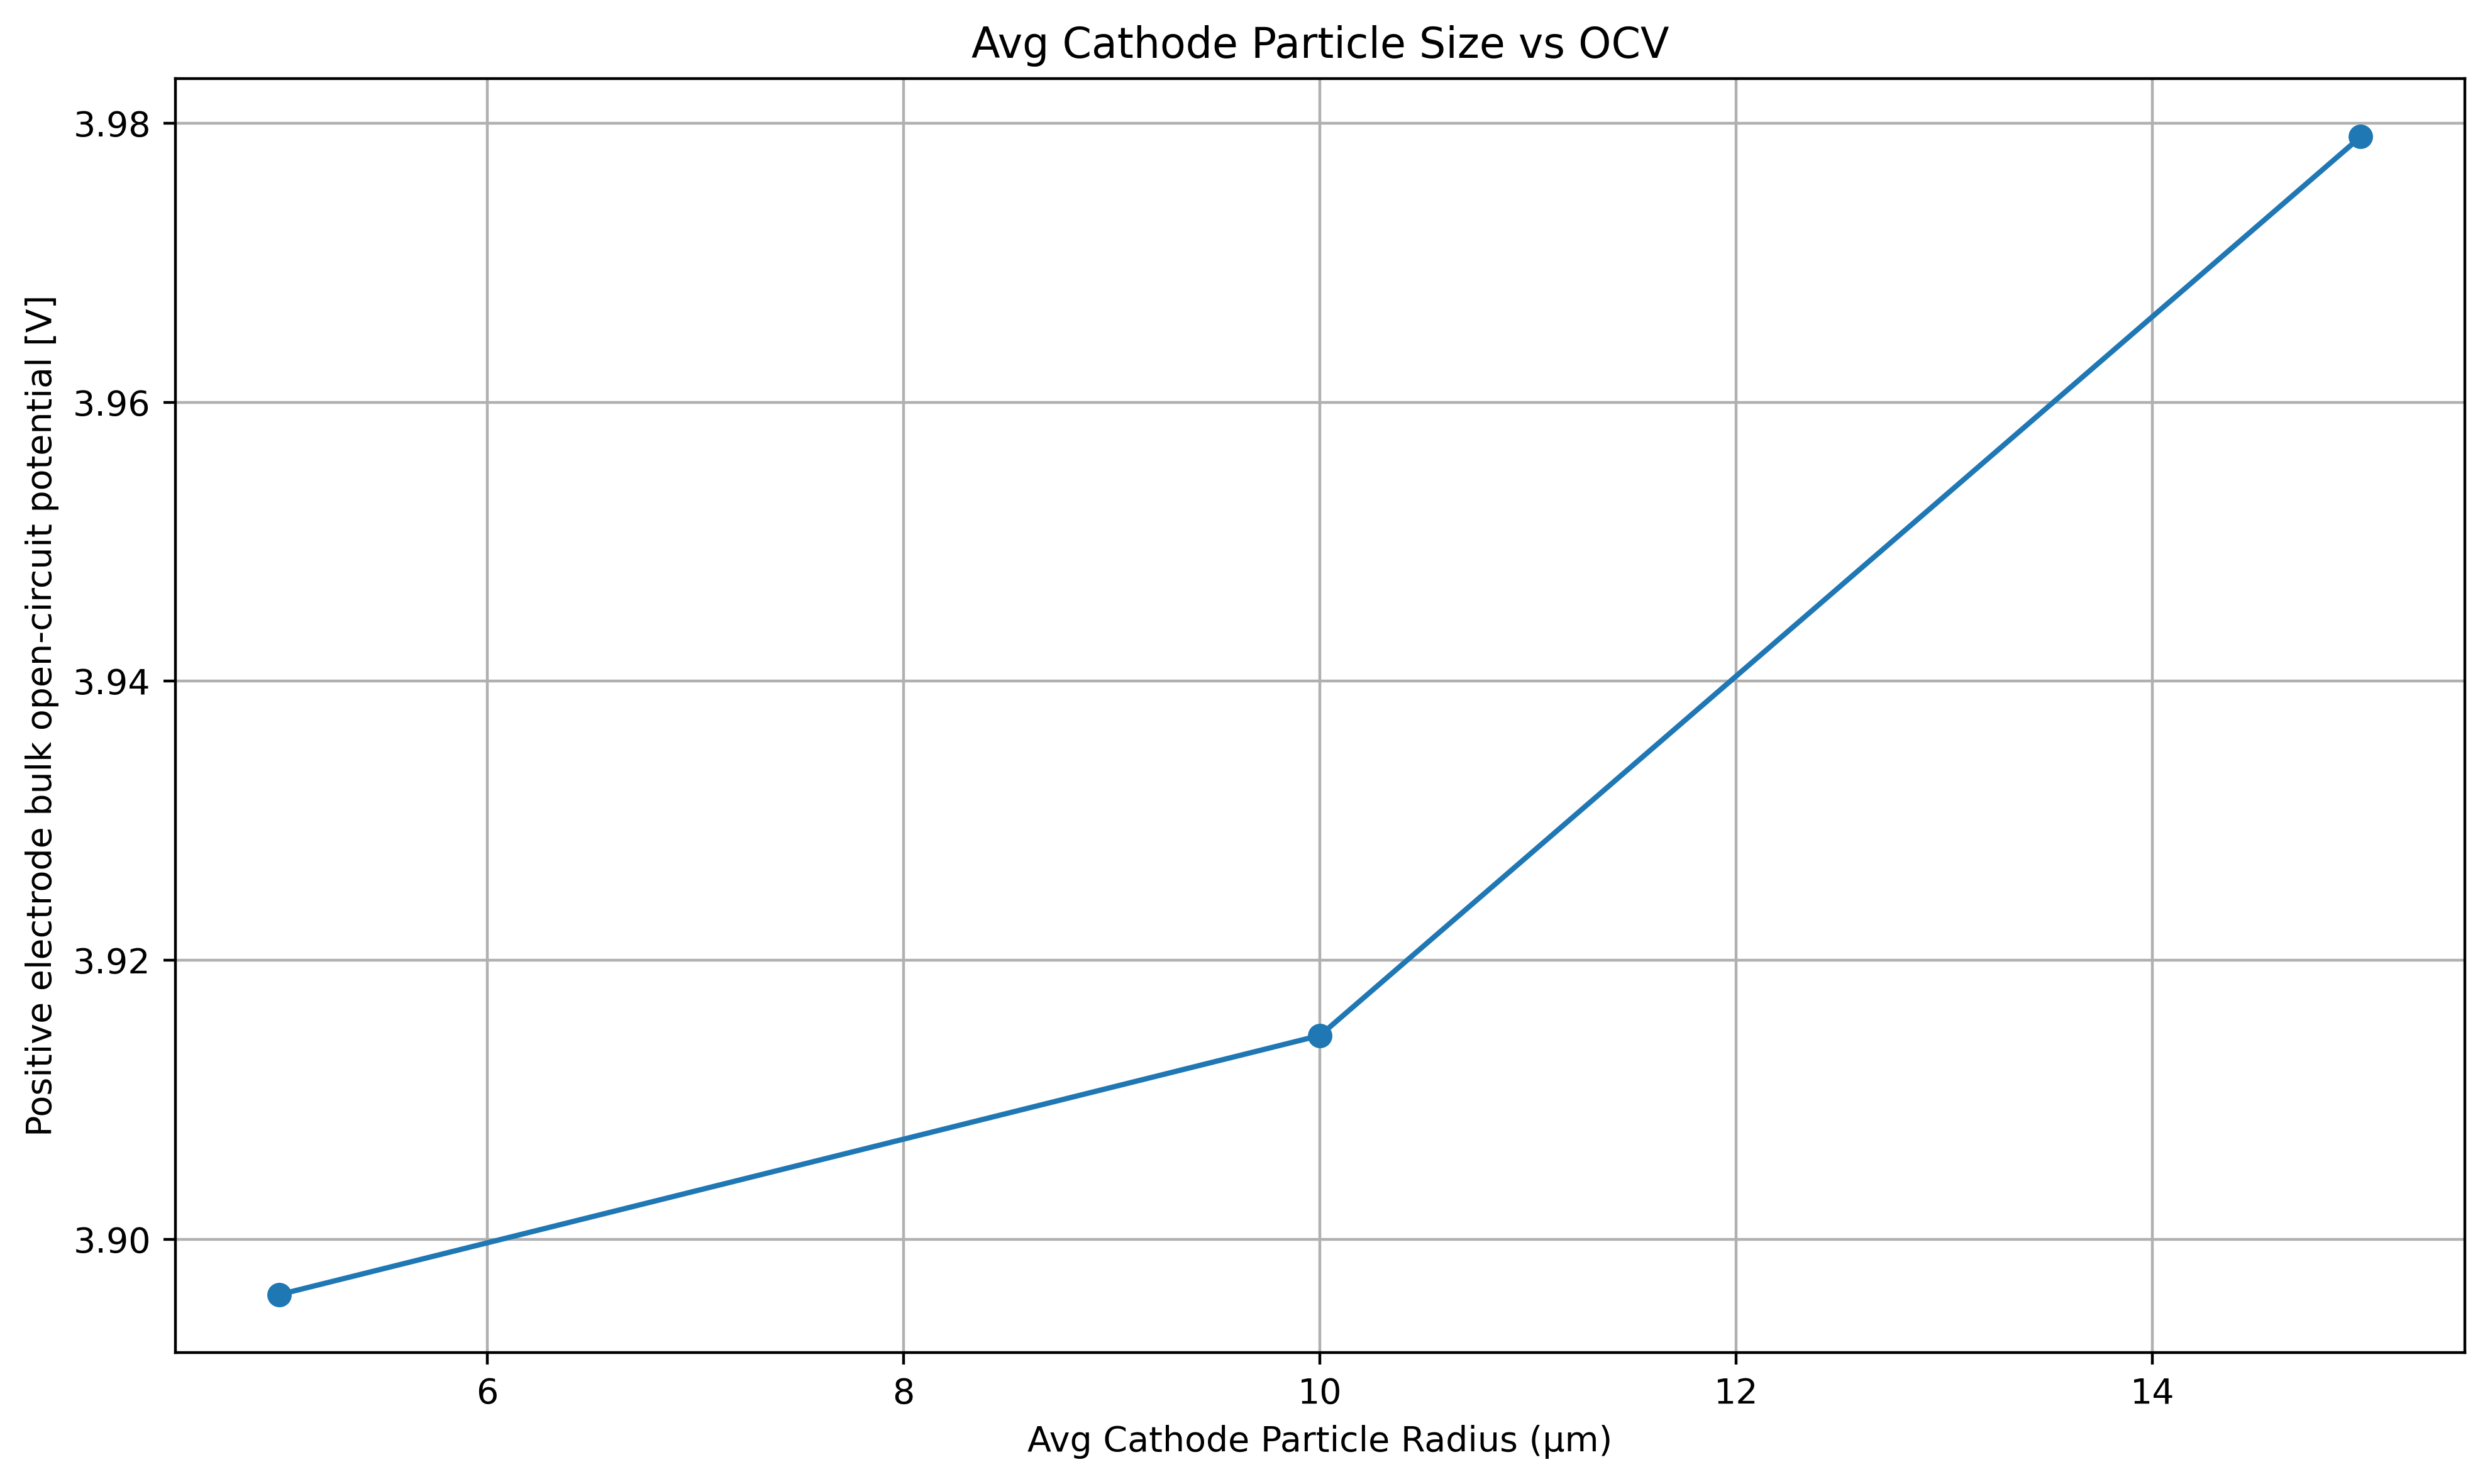

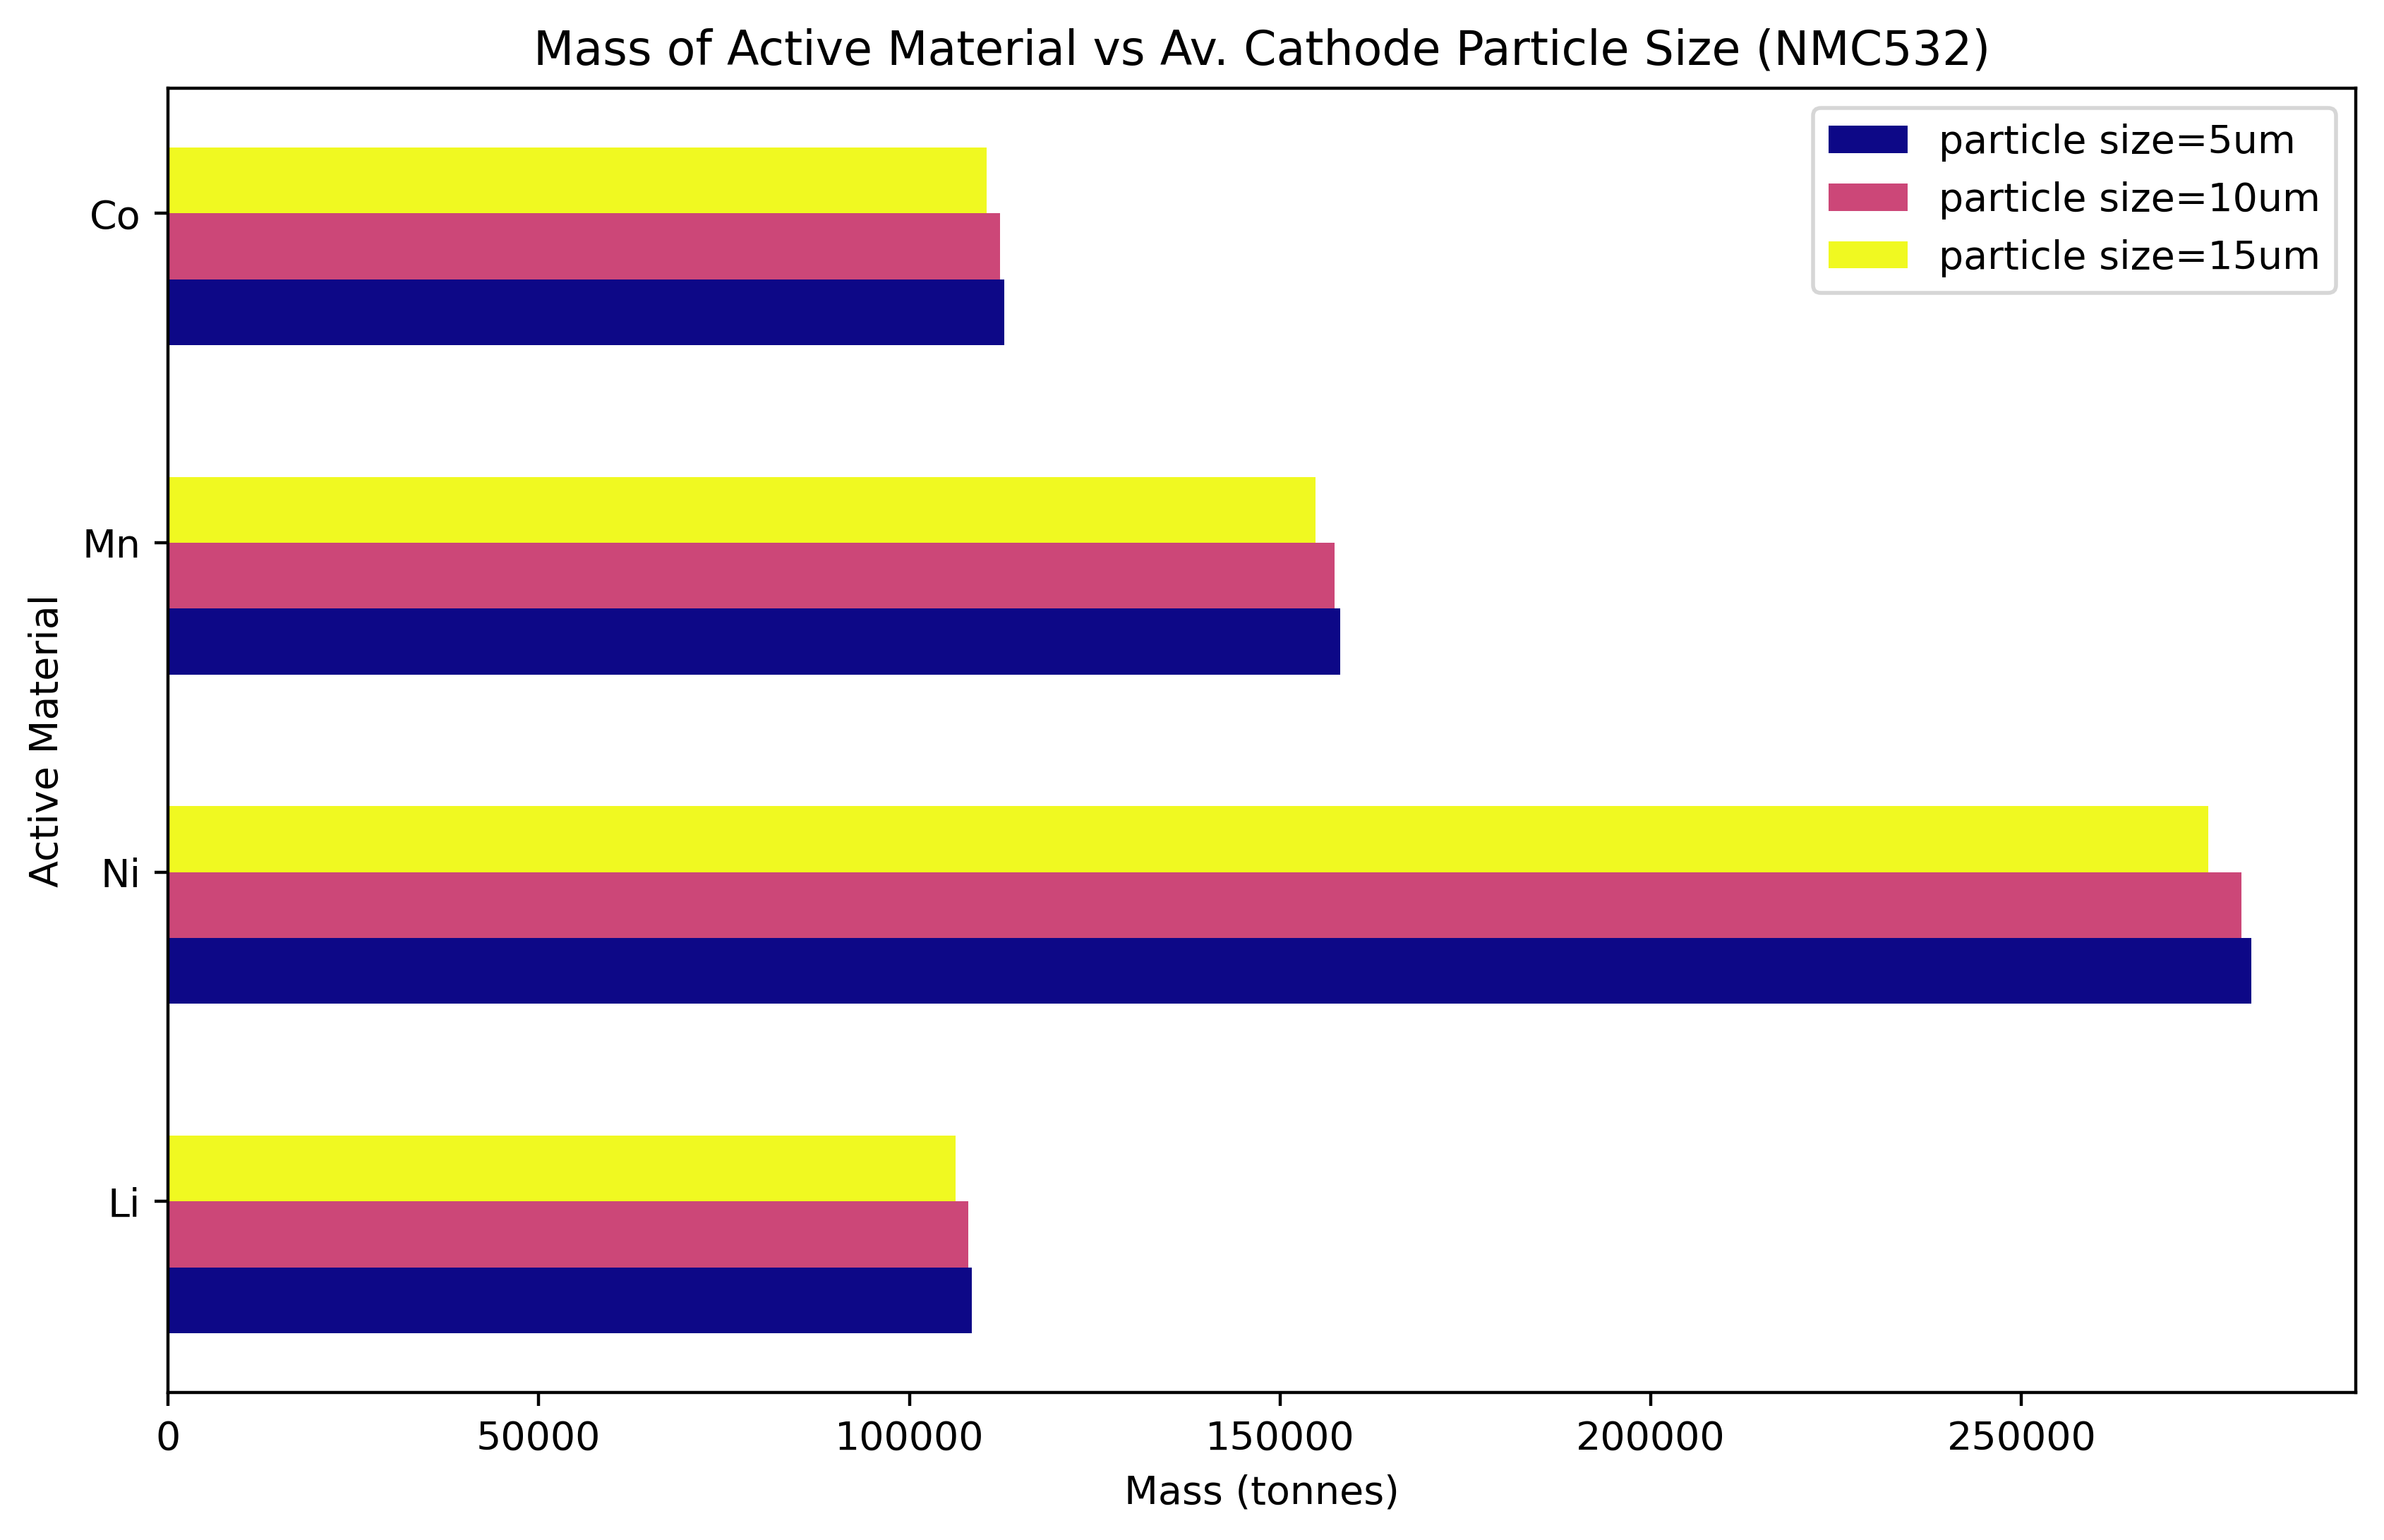

In [20]:
# vary cathode particle size, output mass critical mineral required (NMC532) 

particle_sizes_um = [5, 10, 15]
particle_sizes_m = [r * 1e-6 for r in particle_sizes_um]

av_voltages = []
for radius_m in particle_sizes_m:
    print(f"Solving for radius = {radius_m * 1e6:.0f} µm")

    try:
        # Set up model and parameters
        model = pybamm.lithium_ion.DFN()
        params = pybamm.ParameterValues("Mohtat2020")
        params.update({"Positive particle radius [m]": radius_m})
        params.update({"Current function [A]": 5})

        # Use a more stable solver (Casadi-based)
        solver = pybamm.CasadiSolver(rtol=1e-6, atol=1e-8)
        
        # Build and run the simulation
        sim = pybamm.Simulation(model, parameter_values=params, solver=solver)
        solution = sim.solve([0, 3600], initial_soc=1.0)

        # Compute average voltage
        voltage = np.mean(solution["Positive electrode bulk open-circuit potential [V]"].data)
        av_voltages.append(voltage)

    except pybamm.SolverError as e:
        print(f"Solver failed for radius = {radius_m * 1e6:.0f} µm. Error: {e}")
        av_voltages.append(np.nan)  

# Plot the results
plt.figure(dpi=400, figsize=(10, 6))
plt.plot(particle_sizes_um, av_voltages, marker='o', linestyle='-', color='tab:blue')
plt.xlabel("Avg Cathode Particle Radius (µm)")
plt.ylabel("Positive electrode bulk open-circuit potential [V]")
plt.title("Avg Cathode Particle Size vs OCV")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(dpi=400, figsize=(10, 6))
from matplotlib import colormaps as cmap
cmap = plt.cm.plasma
colors = cmap(np.linspace(0,1,len(av_voltages)))
names = ['Li', 'Ni', 'Mn', 'Co']
for i, (voltage, size, color) in enumerate(zip(av_voltages,particle_sizes_um,colors)): # i is the enumerate index, (voltage,porosity,color) each gets asigned the corresponding tuple value from zip
    mass = AM_calc(1000, voltage, 532) # CHANGE CHEMISTRY 
    y_pos = np.arange(len(names)) + i*0.2
    plt.barh(y_pos, mass, color=color, height = 0.2, label = f'particle size={size}um') 

plt.yticks(np.arange(len(names)) + 0.3, names)
plt.legend()
plt.xlabel('Mass (tonnes)')
plt.ylabel('Active Material')
plt.title('Mass of Active Material vs Av. Cathode Particle Size (NMC532)')
plt.show()

Input varying cathode thickness, output mass of critical mineral required, for 1. NMC811, 2. NMC532

At t = 250.866 and h = 3.76036e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 250.866 and h = 3.76035e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 105.413 and h = 3.77452e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 32.6857 and h = 6.16175e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 32.6857 and h = 6.16246e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 13.9356 and h = 3.76323e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 4.56061 and h = 3.77417e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 4.56067 and h = 2.8898e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 2.21686 and h = 1.11641e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 1.04498 and h = 3.76283e-12, the corrector convergence failed repeatedly or with |h| = hmin.
A

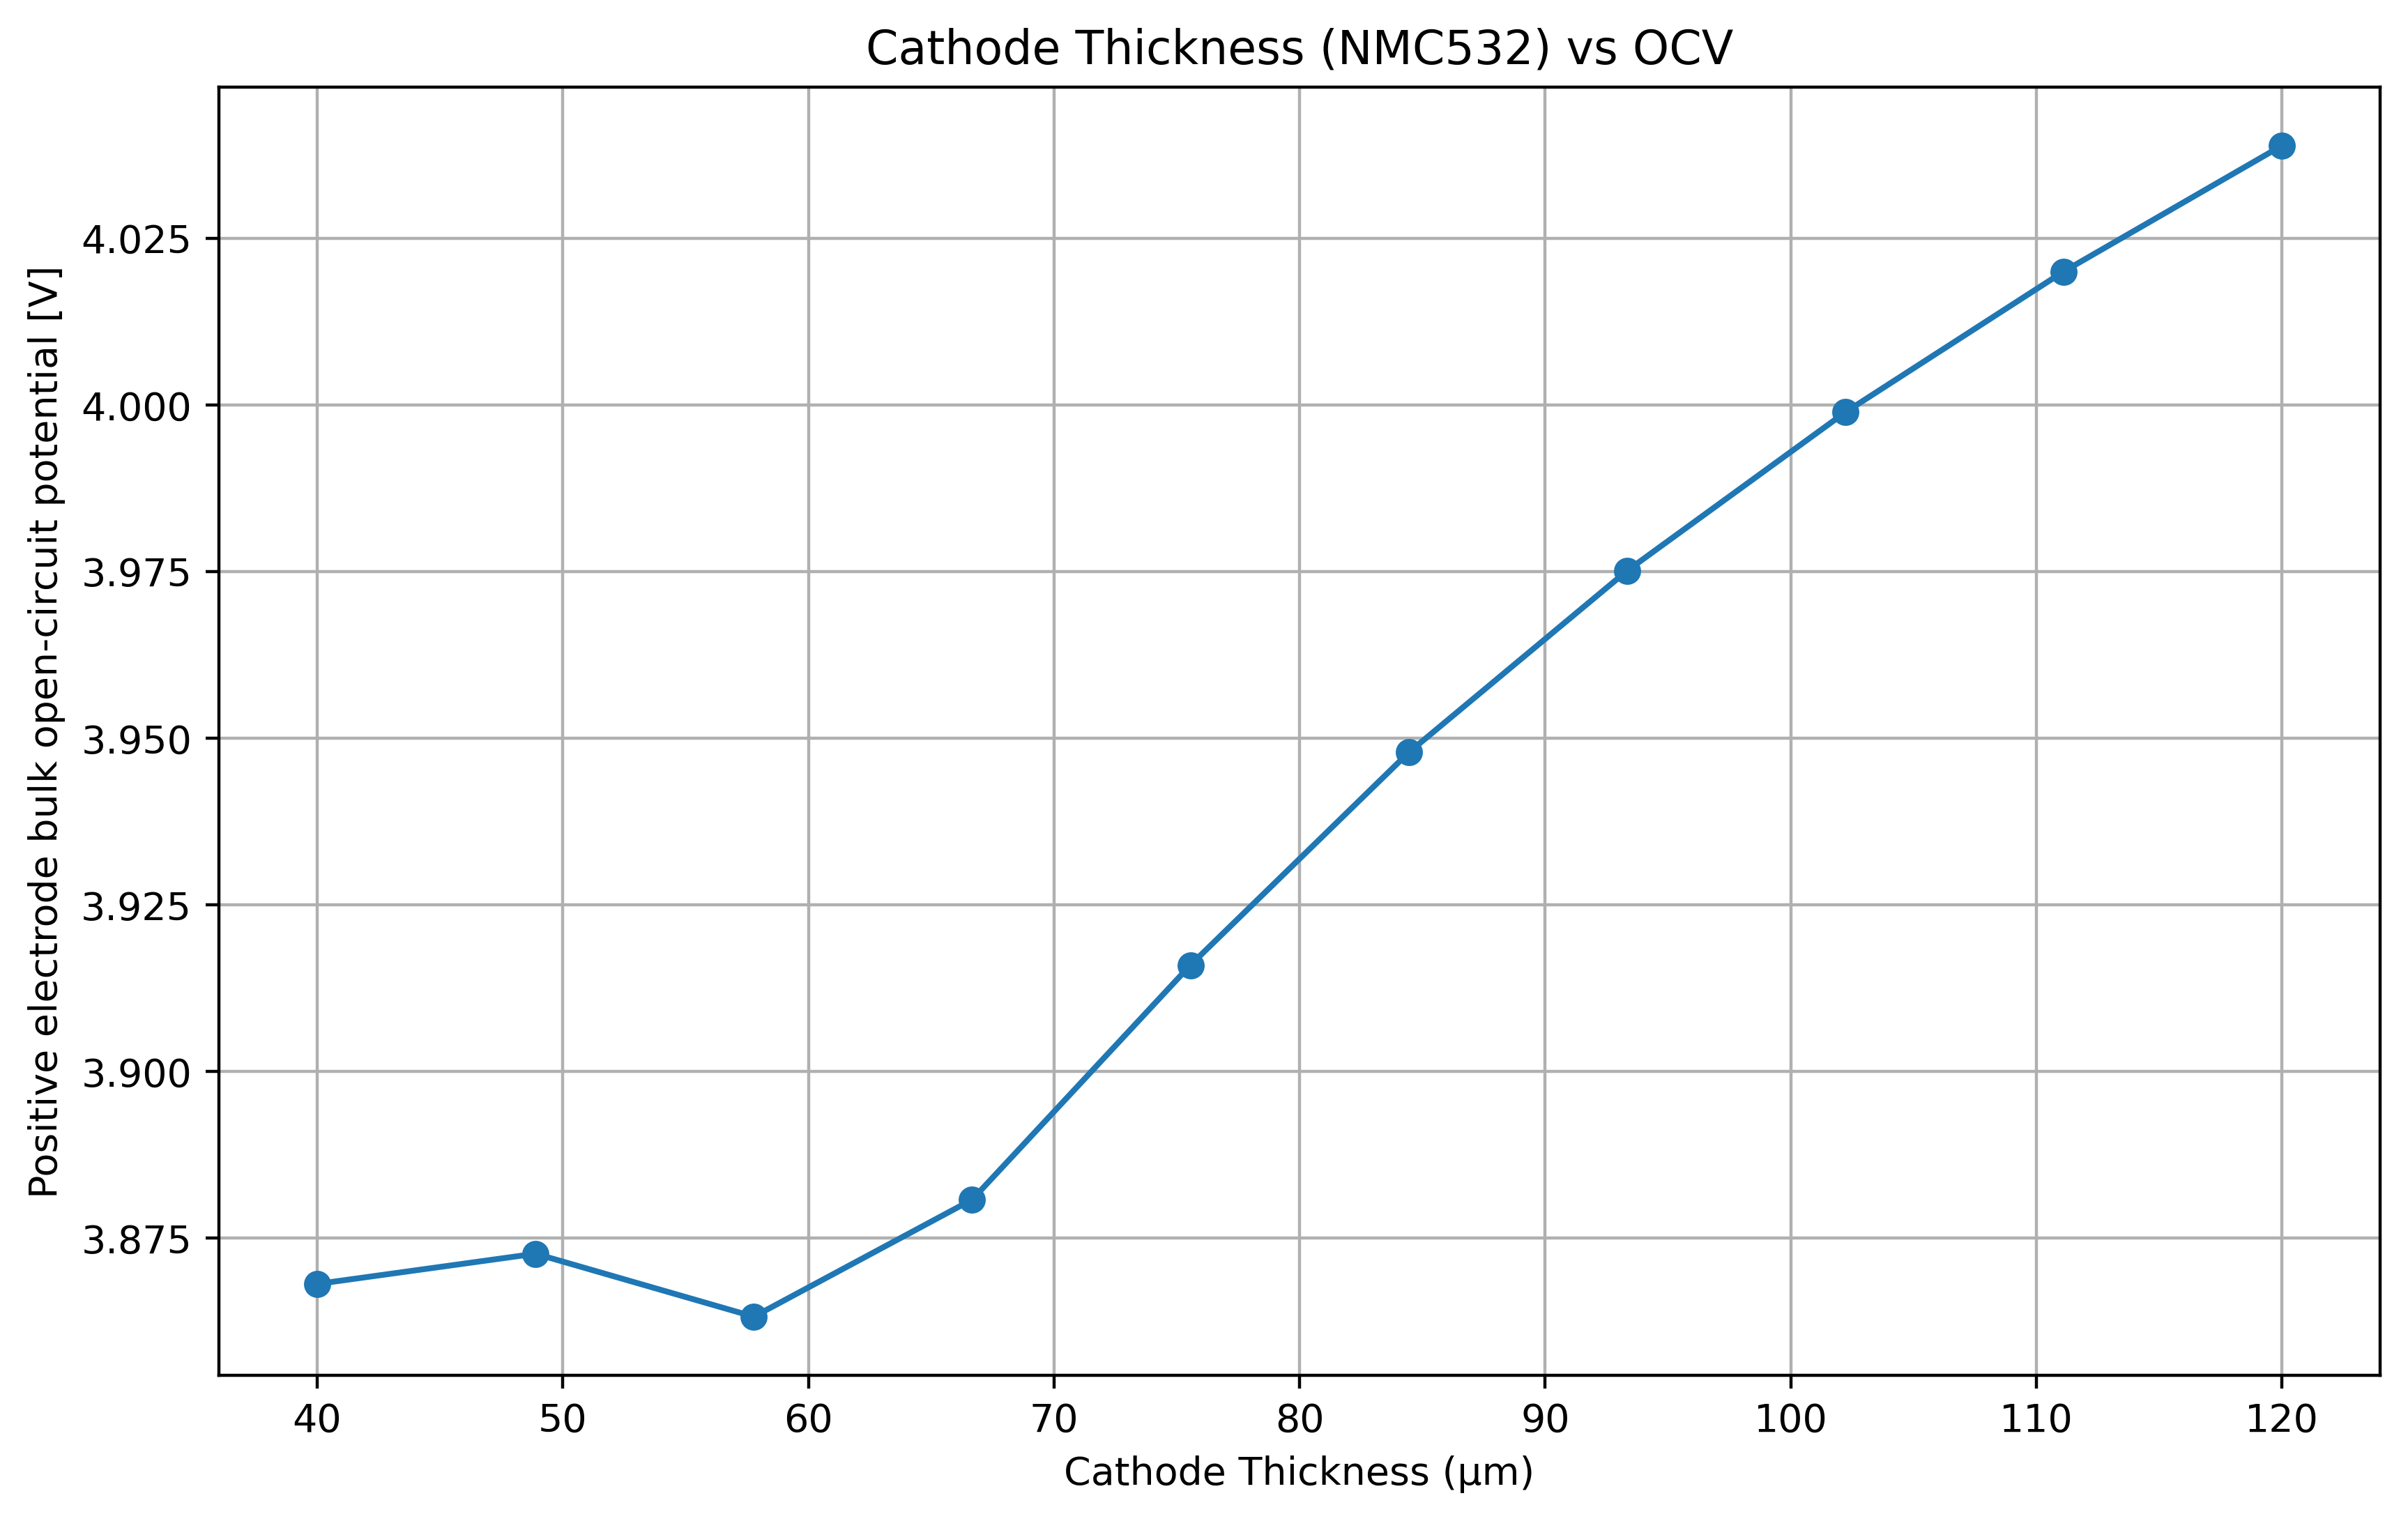

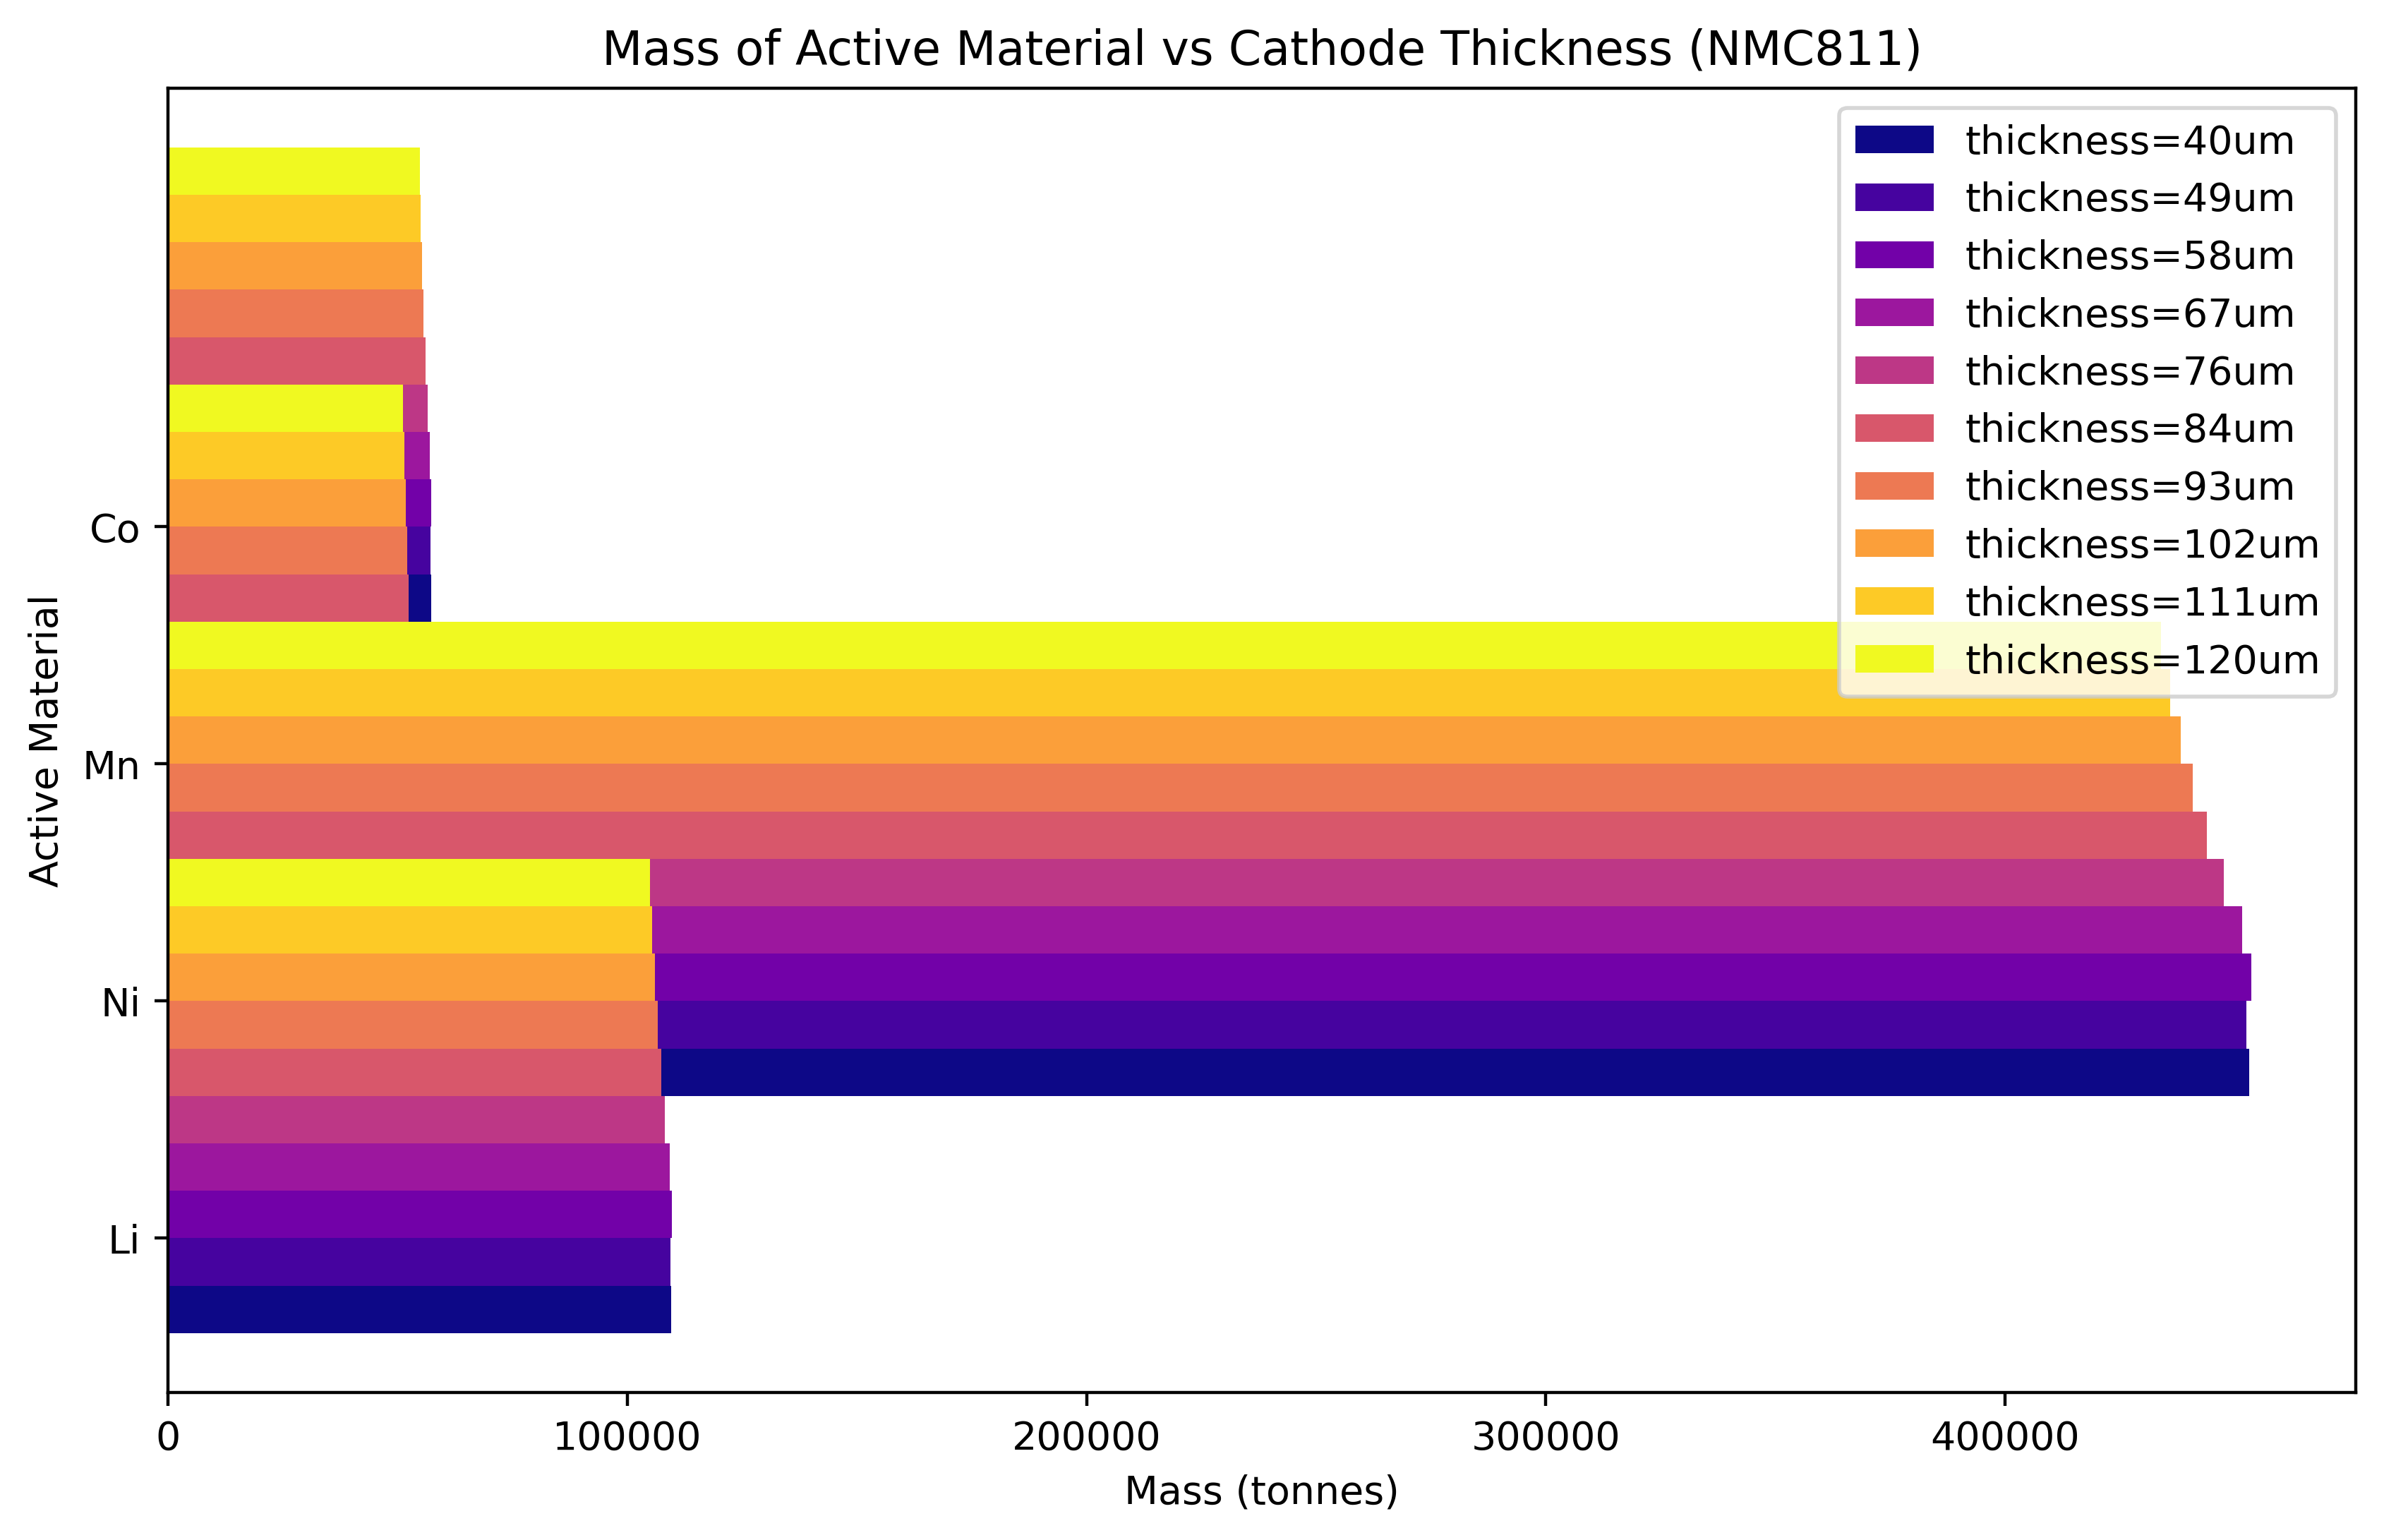

In [21]:
# vary cathode thickness for nominal voltage output (NMC811)

# defalt from params is 5 Ah cell nominal capacity , use 5 A current over 1 hr for 1C
# when changing thickness, need to recalculate capacity and current for 1C 

model = pybamm.lithium_ion.DFN()

param = pybamm.ParameterValues("Chen2020")
solver = pybamm.CasadiSolver(rtol=1e-4, atol=1e-6) # loosening tolerances to accomidate initial conditions 

# cathode thicknesses (meters)
thickness_values = np.linspace(40e-6, 120e-6, 10)  # 40 to 120 microns, cath. default 67um 

av_voltages = []

# recalculating capacity and 1C current: assumptions 
material_cap = 0.195 # NMC532 capacity in Ah/g
density = 2450000 # 2.45 g/cm^3 tap density, 2.45 * 10^6 g/m^3
loading = 0.955

for L in thickness_values:
    # Update parameter values with new cathode thickness and currents 
    param.update({"Positive electrode thickness [m]": L})
    params.update({"Current function [A]": "[input]"})
    

    # updating current based on new capacity 
    C_rate = 1  # 1C discharge
    grams = (L * (params['Electrode height [m]']*(10**-6)) * (params['Electrode width [m]']*(10**-6))) * (density) * (loading) # mass of active material
    capacity = material_cap * grams # Ah/g * g
    current = capacity / C_rate # Ah / h = Ampere current 

    sim = pybamm.Simulation(model, parameter_values=param, solver=solver)
    sim.solve([0, 3600], inputs={"Current function [A]": current}, initial_soc=1.0)


    voltage = sim.solution["Positive electrode bulk open-circuit potential [V]"].entries
    avg_voltage = voltage.mean()
    av_voltages.append(avg_voltage)

plt.figure(dpi=400, figsize=(10, 6))
plt.plot(thickness_values * 1e6, av_voltages, marker='o')
plt.xlabel("Cathode Thickness (μm)")
plt.ylabel("Positive electrode bulk open-circuit potential [V]")
plt.title("Cathode Thickness (NMC532) vs OCV")
plt.grid(True)
plt.show()

plt.figure(dpi=400, figsize=(10, 6))
from matplotlib import colormaps as cmap
cmap = plt.cm.plasma
colors = cmap(np.linspace(0,1,len(av_voltages)))
names = ['Li', 'Ni', 'Mn', 'Co']
for i, (voltage, thickness, color) in enumerate(zip(av_voltages,thickness_values,colors)): # i is the enumerate index, (voltage,porosity,color) each gets asigned the corresponding tuple value from zip
    mass = AM_calc(1000, voltage, 811) 
    y_pos = np.arange(len(names)) + i*0.2
    plt.barh(y_pos, mass, color=color, height = 0.2, label = f'thickness={thickness*1000000:.0f}um') 

plt.yticks(np.arange(len(names)) + 0.3, names)
plt.legend()
plt.xlabel('Mass (tonnes)')
plt.ylabel('Active Material')
plt.title('Mass of Active Material vs Cathode Thickness (NMC811)')
plt.show()

At t = 325.933 and h = 4.40027e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 35.0243 and h = 7.31568e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 35.0242 and h = 1.4093e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 35.0243 and h = 1.95394e-20, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 35.0242 and h = 1.7768e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 207.087 and h = 4.57283e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 207.087 and h = 9.43515e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 61.632, repeated recoverable residual errors.
At t = 61.632 and h = 2.1923e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 25.2683 and h = 1.76165e-12, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 99.8437 and h = 4.68848e-12, the corrector c

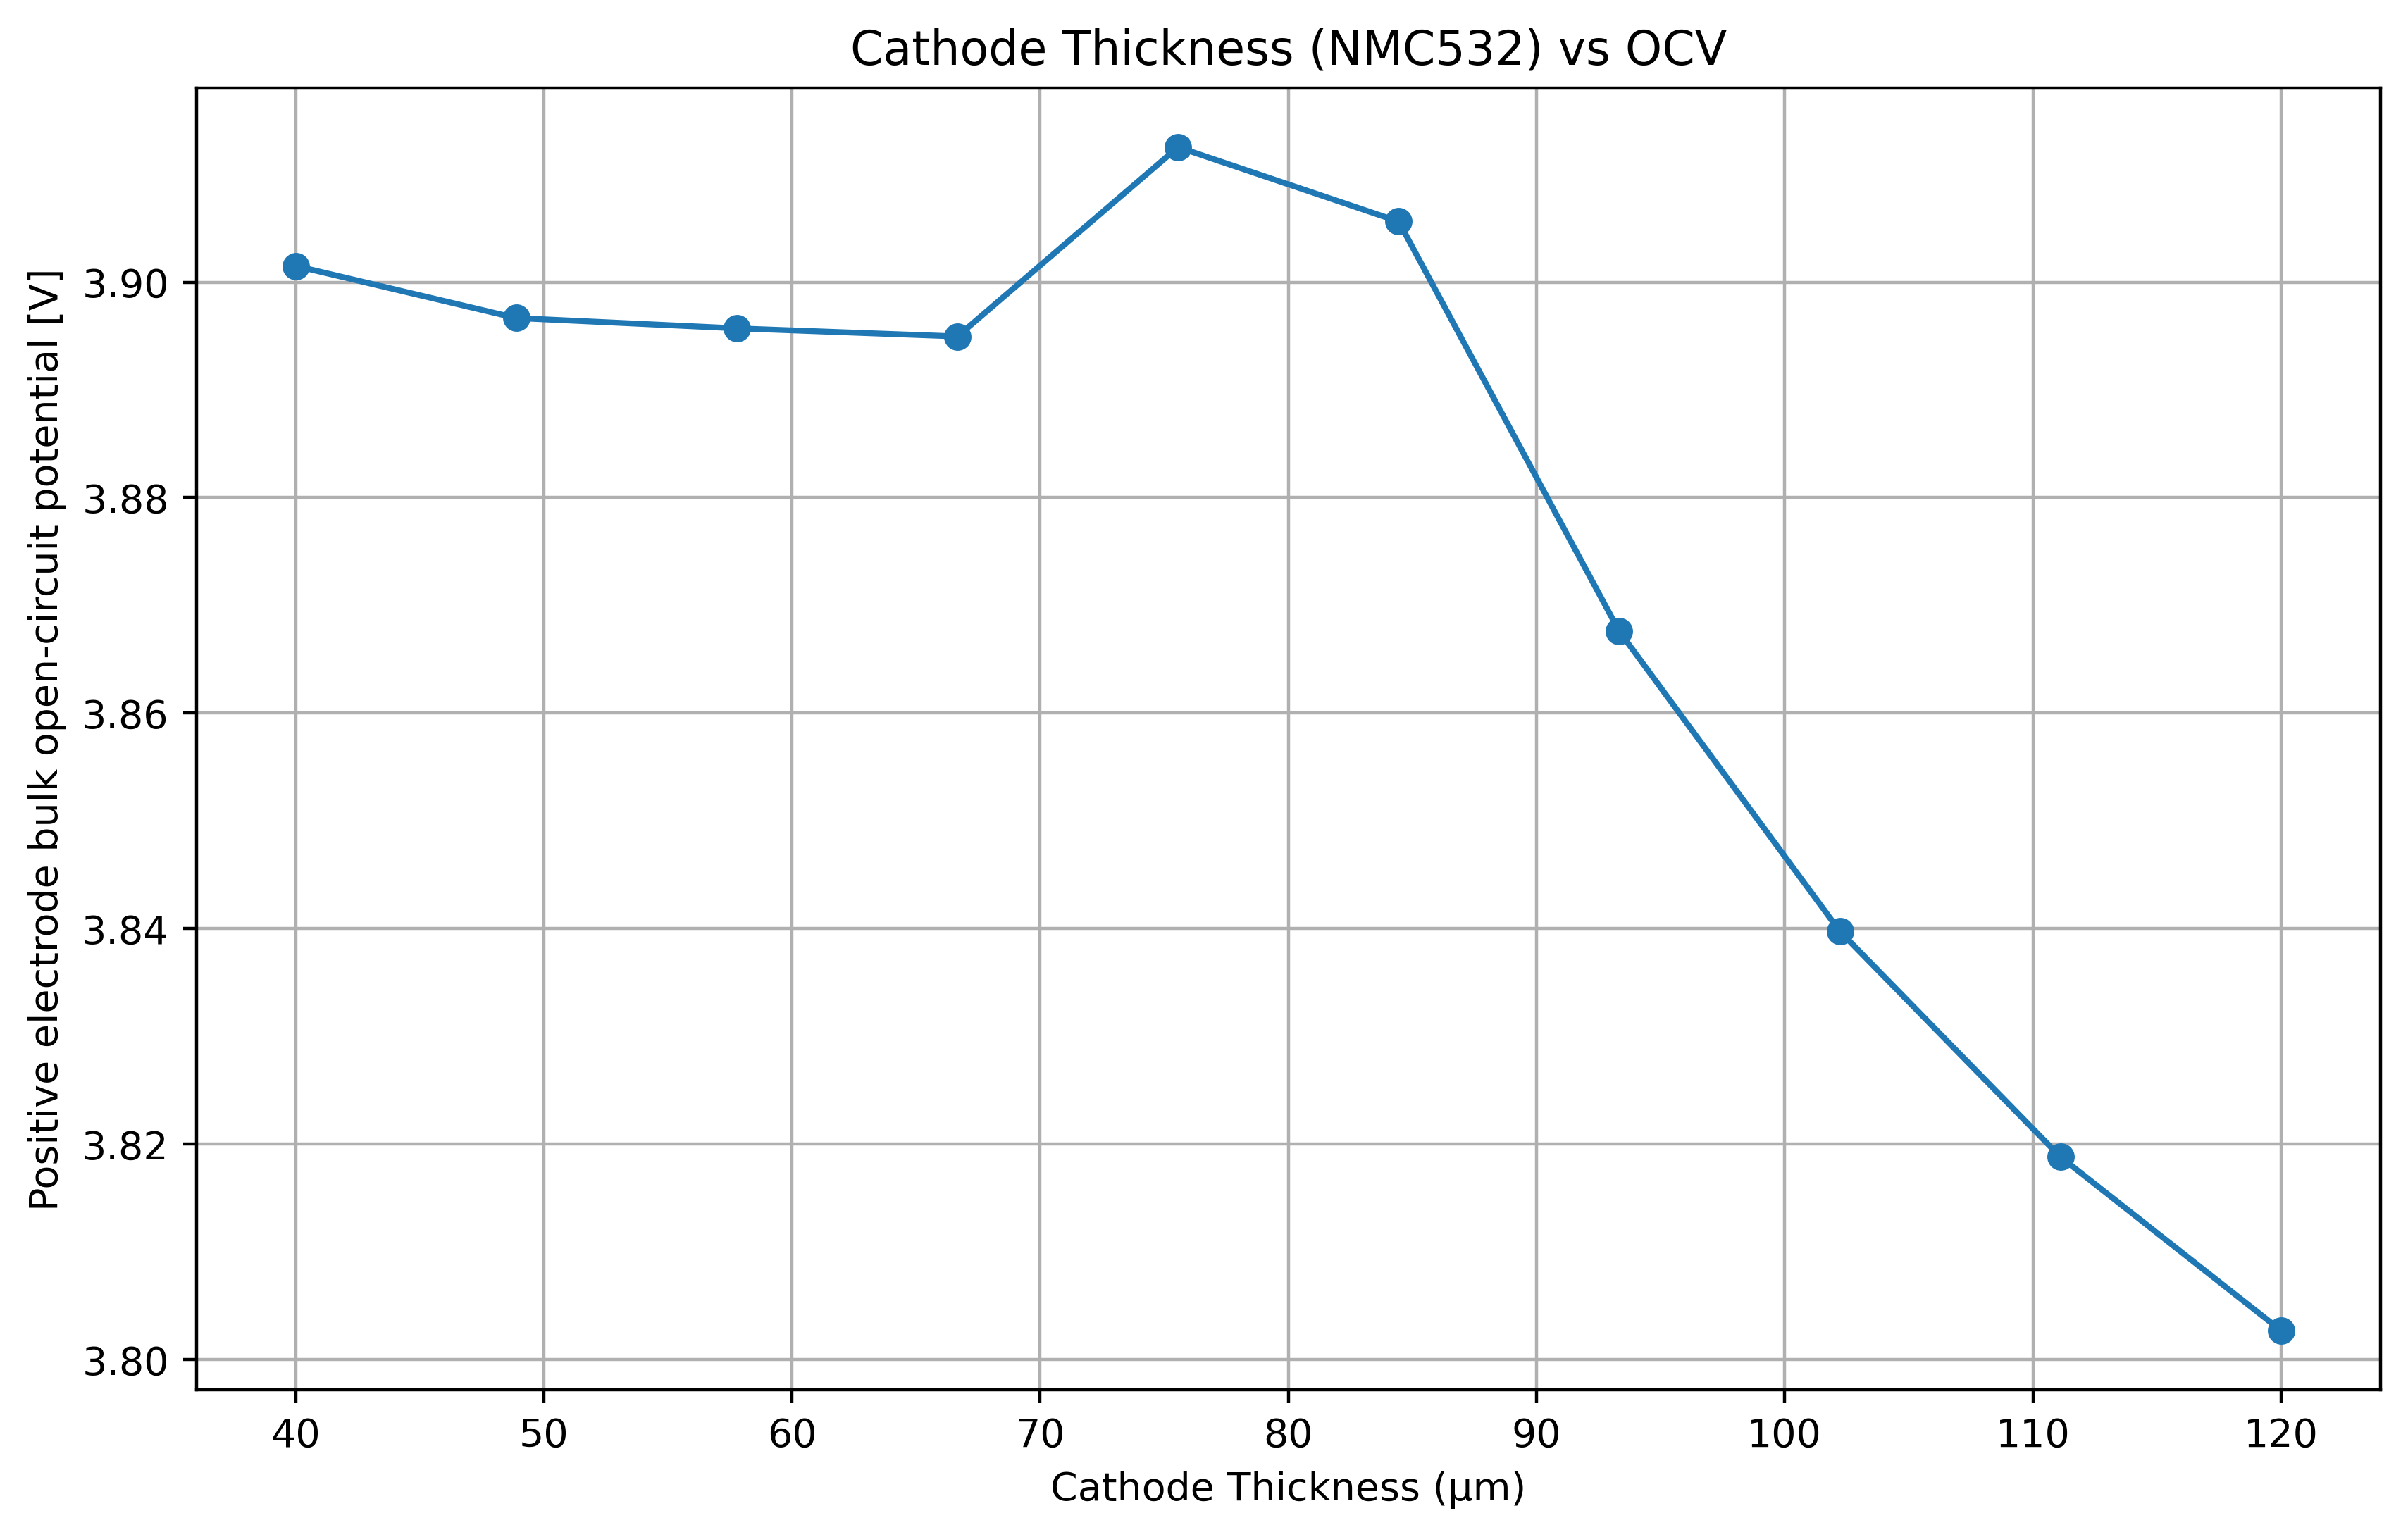

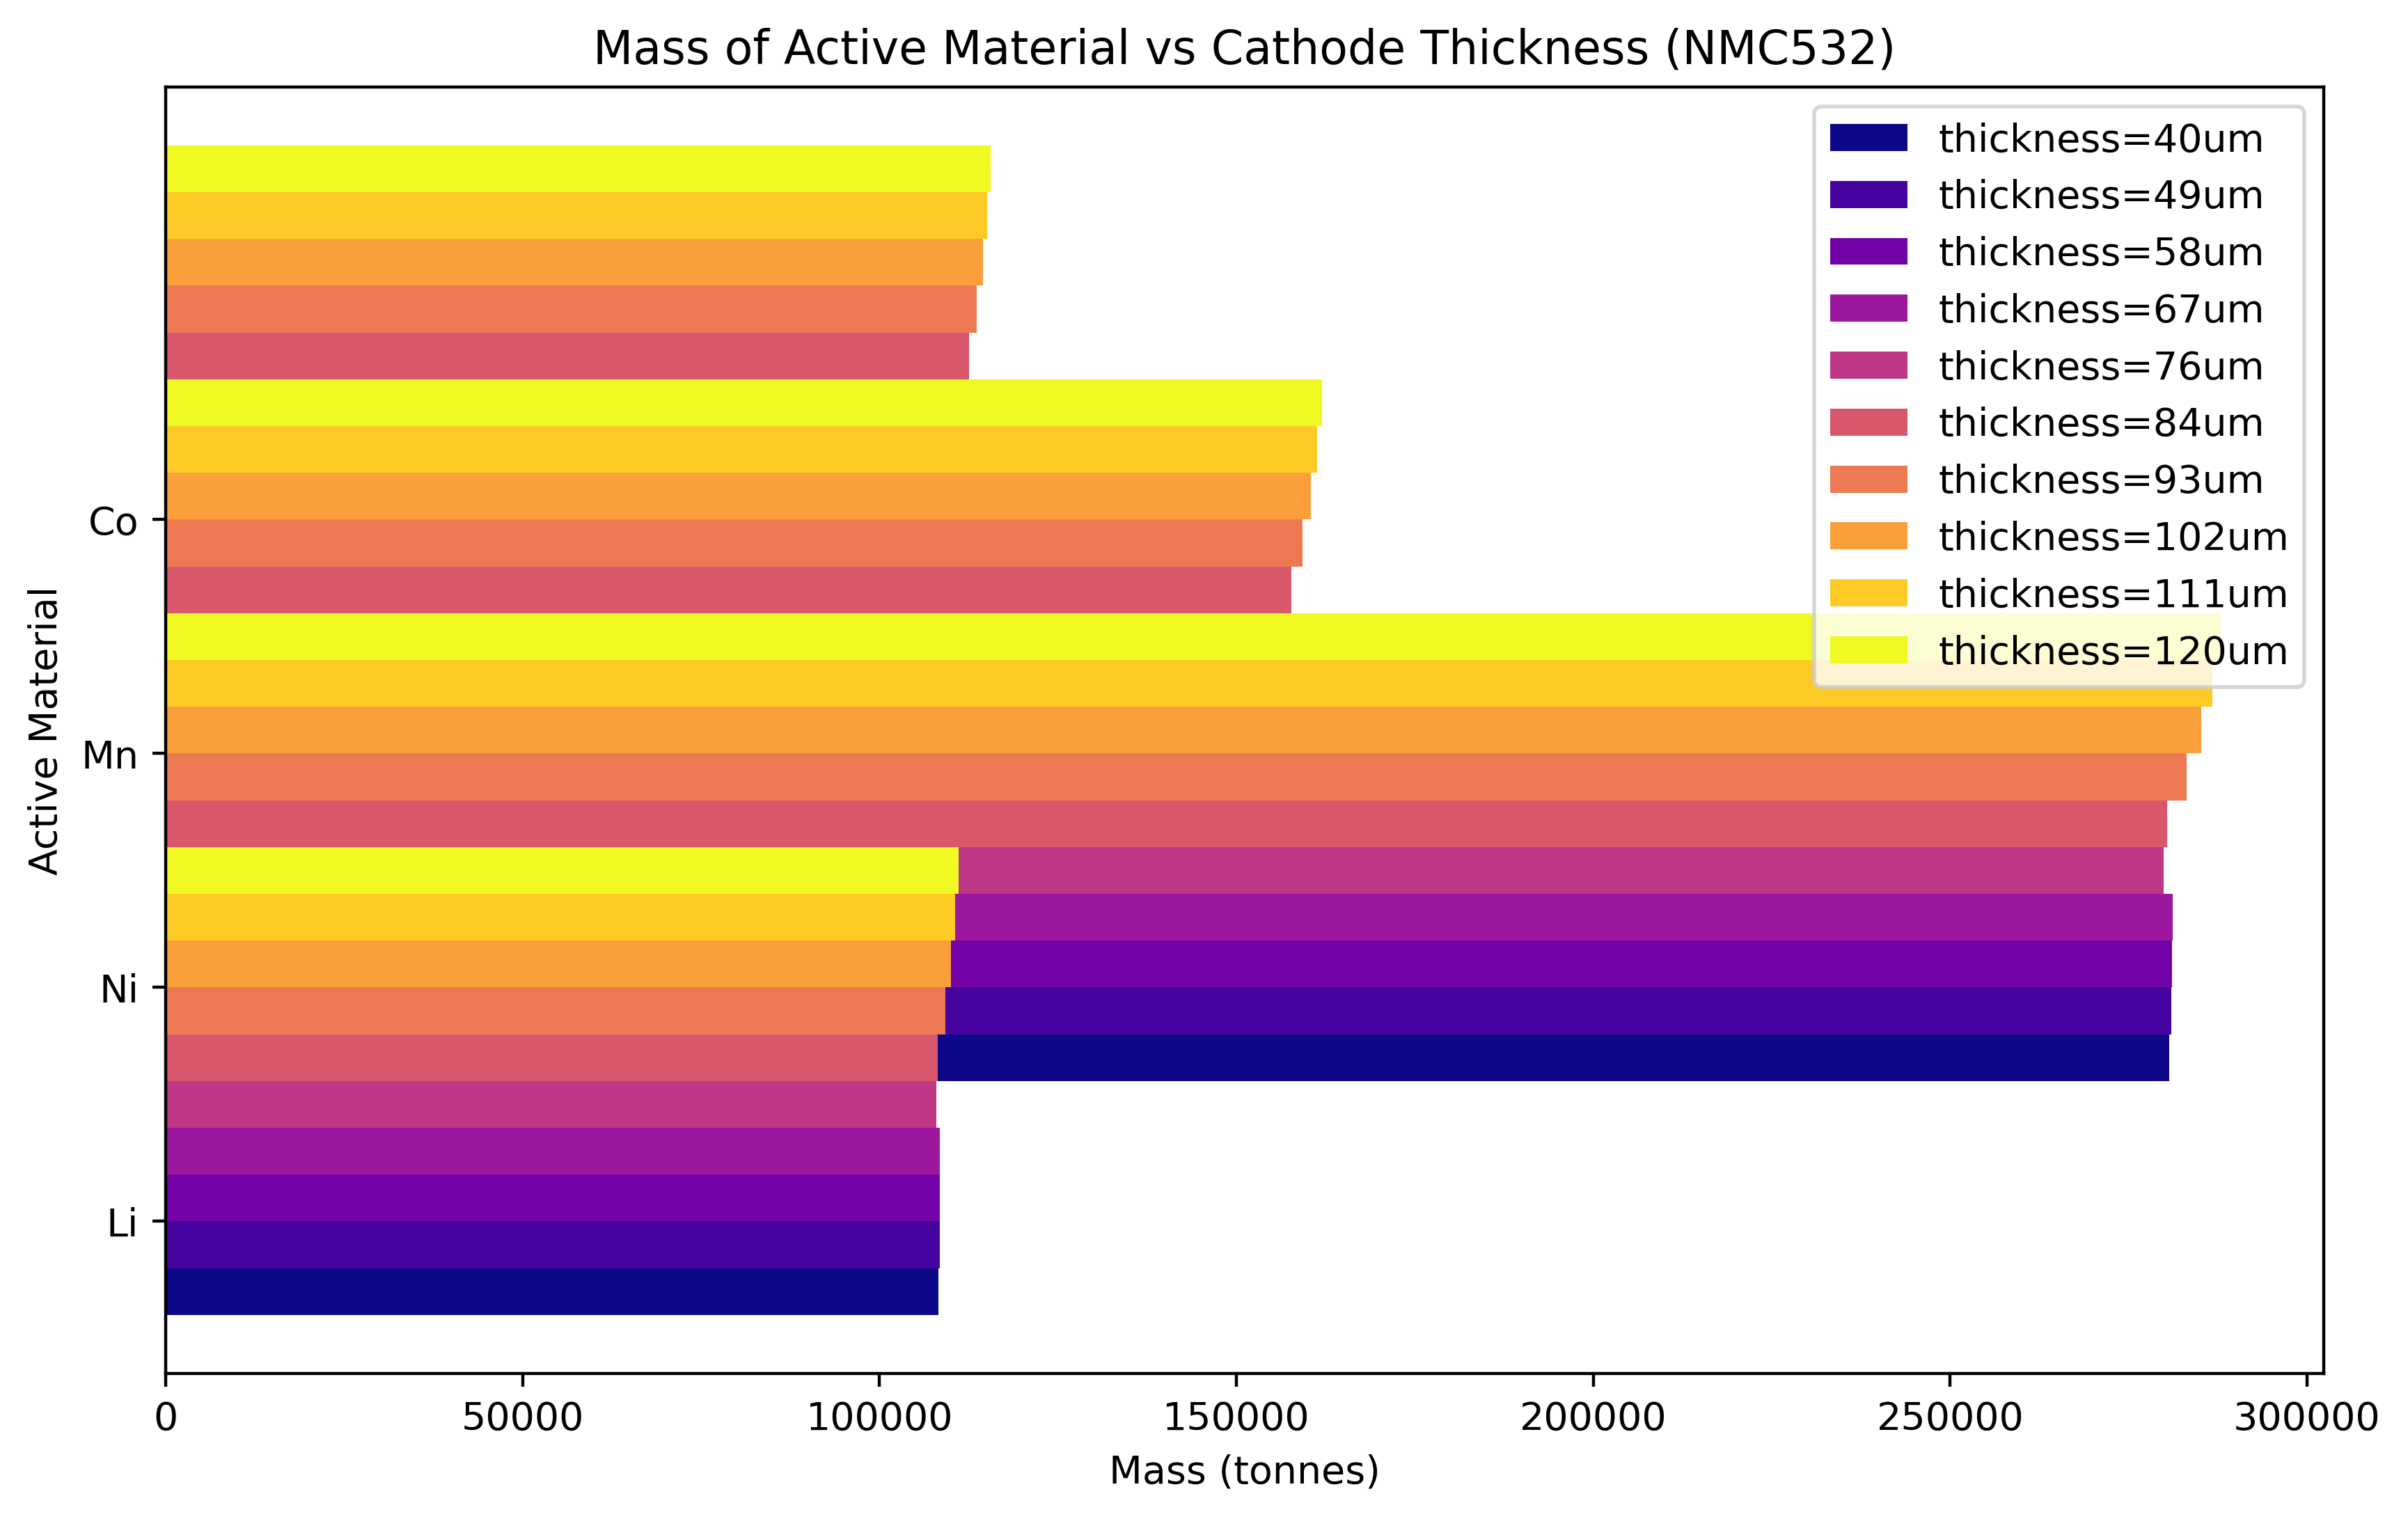

In [22]:
# vary cathode thickness for nominal voltage output (NMC532)

# defalt from params is 5 Ah cell nominal capacity , use 5 A current over 1 hr for 1C
# when changing thickness, need to recalculate capacity and current for 1C 

model = pybamm.lithium_ion.DFN()

param = pybamm.ParameterValues("Mohtat2020")
solver = pybamm.CasadiSolver(rtol=1e-4, atol=1e-6) # loosening tolerances to accomidate initial conditions 

# cathode thicknesses (meters)
thickness_values = np.linspace(40e-6, 120e-6, 10)  # 40 to 120 microns, cath. default 67um 

av_voltages = []

# recalculating capacity and 1C current: assumptions 
material_cap = 0.165 # NMC532 capacity in Ah/g
density = 2500000 # 2.5 g/cm^3 tap density, 2.5 * 10^6 g/m^3
loading = 0.955

for L in thickness_values:
    # Update parameter values with new cathode thickness and currents 
    param.update({"Positive electrode thickness [m]": L})
    params.update({"Current function [A]": "[input]"})
    

    # updating current based on new capacity 
    C_rate = 1  # 1C discharge
    grams = (L * (params['Electrode height [m]']*(10**-6)) * (params['Electrode width [m]']*(10**-6))) * (density) * (loading) # mass of active material
    capacity = material_cap * grams # Ah/g * g
    current = capacity / C_rate # Ah / h = Ampere current 

    sim = pybamm.Simulation(model, parameter_values=param, solver=solver)
    sim.solve([0, 3600], inputs={"Current function [A]": current}, initial_soc=1.0)


    voltage = sim.solution["Positive electrode bulk open-circuit potential [V]"].entries
    avg_voltage = voltage.mean()
    av_voltages.append(avg_voltage)

plt.figure(dpi=400, figsize=(10, 6))
plt.plot(thickness_values * 1e6, av_voltages, marker='o')
plt.xlabel("Cathode Thickness (μm)")
plt.ylabel("Positive electrode bulk open-circuit potential [V]")
plt.title("Cathode Thickness (NMC532) vs OCV")
plt.grid(True)
plt.show()

plt.figure(dpi=400, figsize=(10, 6))
from matplotlib import colormaps as cmap
cmap = plt.cm.plasma
colors = cmap(np.linspace(0,1,len(av_voltages)))
names = ['Li', 'Ni', 'Mn', 'Co']
for i, (voltage, thickness, color) in enumerate(zip(av_voltages,thickness_values,colors)): # i is the enumerate index, (voltage,porosity,color) each gets asigned the corresponding tuple value from zip
    mass = AM_calc(1000, voltage, 532) 
    y_pos = np.arange(len(names)) + i*0.2
    plt.barh(y_pos, mass, color=color, height = 0.2, label = f'thickness={thickness*1000000:.0f}um') 

plt.yticks(np.arange(len(names)) + 0.3, names)
plt.legend()
plt.xlabel('Mass (tonnes)')
plt.ylabel('Active Material')
plt.title('Mass of Active Material vs Cathode Thickness (NMC532)')
plt.show()

sensitivity factor: mass required / mineral reserve 